In [57]:
import pandas as pd
from pathlib import Path
import numpy as np
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv, find_dotenv
from panel.interact import interact
from datetime import datetime
from pandas import DataFrame



In [3]:
# Import and read csv files
silver=Path('../practice_merge/silver_nasdaq.csv')
silver_df=pd.read_csv(silver, parse_dates=True, index_col="Date", infer_datetime_format = True)

#count nulls
silver_df.isnull().mean()
silver_df.isnull().sum()

Close/Last    0
Volume        9
Open          0
High          0
Low           0
dtype: int64

In [4]:
#drop nulls
silver_df.dropna(inplace=True)
silver_df.head()

Close/Last   Volume    Open    High     Low
Date                                                   
2021-06-29      25.901  71600.0  26.235  26.235  25.580
2021-06-28      26.254  39778.0  26.220  26.335  25.875
2021-06-25      26.126  30865.0  26.055  26.415  26.010
2021-06-24      26.089  24656.0  25.980  26.280  25.905
2021-06-23      26.152  22485.0  25.890  26.410  25.850

In [5]:
silver_df.pct_change().dropna(inplace=True)
#silver_df.head()

In [6]:
#read gold data
gold=Path('../practice_merge/gold_nasdaq.csv')
gold_df=pd.read_csv(gold,  parse_dates=True, index_col="Date", infer_datetime_format = True)


#count nulls
gold_df.isnull().mean()
gold_df.isnull().sum()


Close/Last    0
Volume        3
Open          0
High          0
Low           0
dtype: int64

In [7]:
# Drop nulls
gold_df.dropna(inplace=True)
gold_df.head()

Close/Last    Volume    Open    High     Low
Date                                                    
2021-06-29      1763.6  232701.0  1778.8  1779.2  1750.1
2021-06-28      1780.7  158467.0  1782.0  1786.1  1770.4
2021-06-25      1777.8  158121.0  1775.7  1791.0  1773.6
2021-06-24      1776.7  148872.0  1778.2  1788.6  1772.7
2021-06-23      1783.4  175084.0  1779.1  1795.6  1773.1

In [8]:
# Read Platinum data
platinum=Path('../practice_merge/platinum_nasdaq.csv')
platinum_df=pd.read_csv(platinum,  parse_dates=True, index_col="Date", infer_datetime_format = True)

#count nulls 
platinum_df.isnull().mean()
platinum_df.isnull().sum()

Close/Last     0
Volume        58
Open           0
High           0
Low            0
dtype: int64

In [9]:
#drop nulls

platinum_df.dropna(inplace=True)
platinum_df.isnull().sum()

Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [10]:
# grab the date and close columns for each

Gold=gold_df.loc[:,['Close/Last','Volume']]
Silver=silver_df.loc[:,['Close/Last','Volume']]
Platinum=platinum_df.loc[:,['Close/Last','Volume']]

In [11]:
#concat the three graphs
precious_metals=pd.concat([Gold,Silver,Platinum],axis='columns',join='inner')
precious_metals.tail()

Close/Last    Volume  Close/Last    Volume  Close/Last   Volume
Date                                                                       
2016-07-06      1367.1  226256.0      20.203   76564.0      1091.3  16058.0
2016-07-05      1358.7  337002.0      19.907  169563.0      1076.9  24558.0
2016-07-01      1339.0   63821.0      19.588   25064.0      1057.1   3323.0
2016-06-30      1320.6  182812.0      18.582   54738.0      1024.3  13365.0
2016-06-29      1326.9  164974.0      18.362   86786.0      1013.5  22729.0

In [12]:

columns=['Gold','Gold Volume','Silver','Silver Volume','Platinum','Platinum Volume']
precious_metals.columns=columns
precious_metals.hvplot(title='Precious Metals',xlabel='Date',ylabel='Close',figsize=(20,30))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [13]:
all_metals=precious_metals.drop(columns=['Silver Volume','Gold Volume','Platinum Volume'])
columns_2=['Gold','Silver','Platinum']
all_metals.columns=columns_2
all_metals.head()


Gold  Silver  Platinum
Date                                
2021-06-29  1763.6  25.901    1070.6
2021-06-28  1780.7  26.254    1099.5
2021-06-25  1777.8  26.126    1105.7
2021-06-24  1776.7  26.089    1096.1
2021-06-23  1783.4  26.152    1089.5

In [14]:
all_metals.hvplot(title='Precious Metals',xlabel='Date',ylabel='Close',figsize=(20,30))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [15]:
metals=precious_metals.drop(columns=['Gold','Silver','Platinum'])
columns_3=['Gold Volume','Silver Volume','Platinum Volume']
metals.columns=columns_3
metals.tail()

Gold Volume  Silver Volume  Platinum Volume
Date                                                   
2016-07-06     226256.0        76564.0          16058.0
2016-07-05     337002.0       169563.0          24558.0
2016-07-01      63821.0        25064.0           3323.0
2016-06-30     182812.0        54738.0          13365.0
2016-06-29     164974.0        86786.0          22729.0

In [16]:
metals.hvplot(title='Precious Metals Volume',xlabel='Date',ylabel='Close',figsize=(20,30))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [17]:
precious_metals.pct_change().sum()


Gold                   -0.233615
Gold Volume        206847.746777
Silver                 -0.127998
Silver Volume      293785.388336
Platinum                0.137407
Platinum Volume    137756.168903
dtype: float64

In [18]:
precious_metals_std=all_metals.std()*np.sqrt(252)
precious_metals_std


Gold        3898.719592
Silver        62.623474
Platinum    1792.961969
dtype: float64

In [19]:
precious_metals.head()

Gold  Gold Volume  Silver  Silver Volume  Platinum  \
Date                                                               
2021-06-29  1763.6     232701.0  25.901        71600.0    1070.6   
2021-06-28  1780.7     158467.0  26.254        39778.0    1099.5   
2021-06-25  1777.8     158121.0  26.126        30865.0    1105.7   
2021-06-24  1776.7     148872.0  26.089        24656.0    1096.1   
2021-06-23  1783.4     175084.0  26.152        22485.0    1089.5   

            Platinum Volume  
Date                         
2021-06-29          18272.0  
2021-06-28          16181.0  
2021-06-25           9942.0  
2021-06-24           8257.0  
2021-06-23          10028.0

In [20]:
precious_metals.index

DatetimeIndex(['2021-06-29', '2021-06-28', '2021-06-25', '2021-06-24',
               '2021-06-23', '2021-06-22', '2021-06-21', '2021-06-18',
               '2021-06-17', '2021-06-16',
               ...
               '2016-07-13', '2016-07-12', '2016-07-11', '2016-07-08',
               '2016-07-07', '2016-07-06', '2016-07-05', '2016-07-01',
               '2016-06-30', '2016-06-29'],
              dtype='datetime64[ns]', name='Date', length=1198, freq=None)

C:\Users\Admin\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


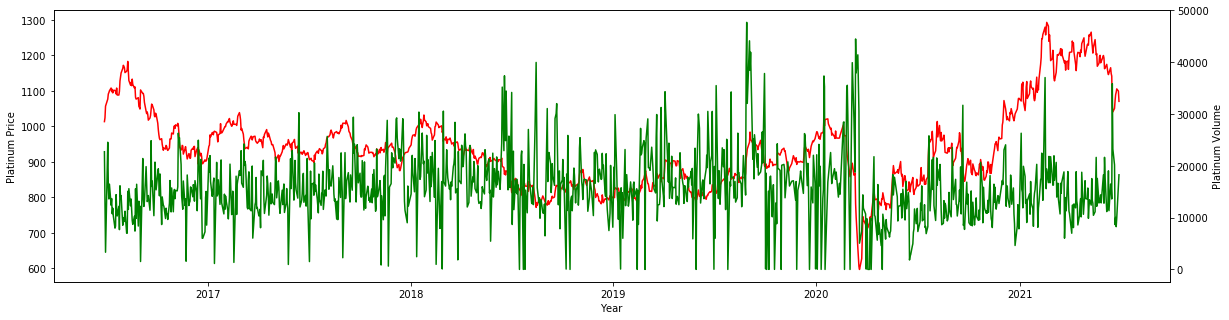

In [21]:
#precious_metals.rolling(window=21).std().plot(title='21-day Window', figsize=(20,10))


fig_platinum,ax = plt.subplots(figsize=(20,5))
ax.plot(precious_metals.index, precious_metals['Platinum'], color="red")
ax.set_xlabel("Year")
ax.set_ylabel("Platinum Price")
ax2 = ax.twinx()
ax2.plot(precious_metals.index, precious_metals['Platinum Volume'],color="green")
ax2.set_ylabel("Platinum Volume")
plt.show()

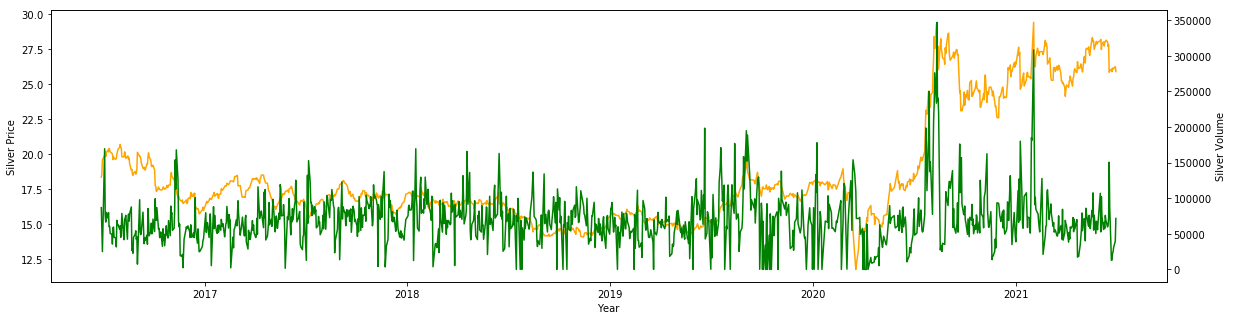

In [22]:
fig_silver,ax = plt.subplots(figsize=(20,5))
ax.plot(precious_metals.index, precious_metals["Silver"], color="orange")
ax.set_xlabel("Year")
ax.set_ylabel("Silver Price")
ax2 = ax.twinx()
ax2.plot(precious_metals.index, precious_metals["Silver Volume"],color="green")
ax2.set_ylabel("Silver Volume")
plt.show()

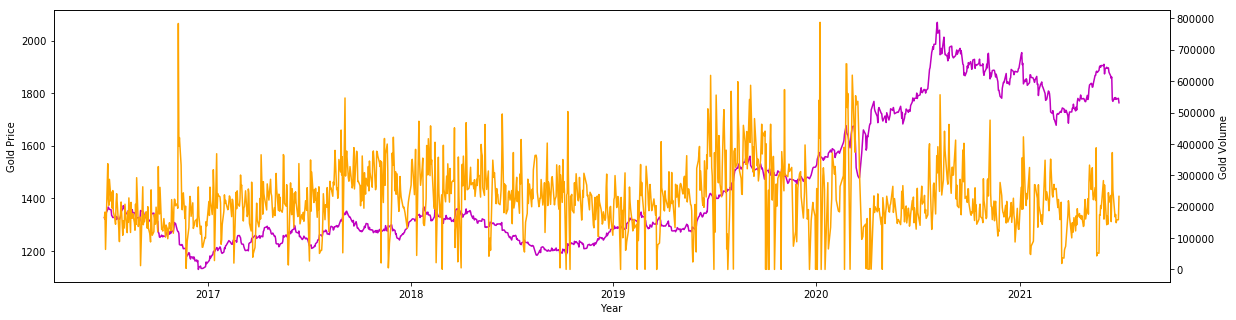

In [23]:
fig_gold,ax = plt.subplots(figsize=(20,5))
ax.plot(precious_metals.index, precious_metals['Gold'], color="m")
ax.set_xlabel("Year")
ax.set_ylabel("Gold Price")
ax2 = ax.twinx()
ax2.plot(precious_metals.index, precious_metals['Gold Volume'],color="orange")
ax2.set_ylabel("Gold Volume")
plt.show()

In [24]:
crude_oil_csv = Path = ('../practice_merge/crude_oil.csv')
crude_oil = pd.read_csv (crude_oil_csv, index_col ='Date', infer_datetime_format=True, parse_dates=True)
crude_oil.head()

Close/Last  Volume   Open   High    Low
Date                                               
2021-06-29       72.98  309029  72.78  73.81  71.97
2021-06-28       72.91  339373  73.99  74.45  72.62
2021-06-25       74.05  345181  73.32  74.18  72.85
2021-06-24       73.30  323860  73.28  73.61  72.32
2021-06-23       73.08  408067  72.91  74.25  72.82

In [25]:

heating_oil_csv = Path = ('../practice_merge/heating_oil.csv')
heating_oil = pd.read_csv (heating_oil_csv, index_col ='Date', infer_datetime_format=True, parse_dates=True)
heating_oil.head()

Close/Last  Volume    Open    High     Low
Date                                                  
2021-06-29      2.1245   37530  2.1220  2.1512  2.1015
2021-06-28      2.1208   48629  2.1496  2.1582  2.1190
2021-06-25      2.1515   57922  2.1660  2.1780  2.0902
2021-06-24      2.1650   52750  2.1635  2.1683  2.1344
2021-06-23      2.1624   57053  2.1551  2.1916  2.1503

In [26]:
natural_gas_csv = Path = ('../practice_merge/natural_gas.csv')
natural_gas = pd.read_csv (natural_gas_csv, index_col ='Date', infer_datetime_format=True, parse_dates=True)
natural_gas.head()

Close/Last  Volume   Open   High    Low
Date                                               
2021-06-29       3.630  196638  3.583  3.811  3.571
2021-06-28       3.593  156940  3.525  3.653  3.505
2021-06-25       3.496   32794  3.425  3.511  3.415
2021-06-24       3.418   47829  3.316  3.442  3.301
2021-06-23       3.333   70154  3.257  3.383  3.250

In [27]:
all_energy_commodities = pd.concat([crude_oil, heating_oil, natural_gas] , axis="columns", join="inner")
all_energy_commodities.head()

Close/Last  Volume   Open   High    Low  Close/Last  Volume  \
Date                                                                      
2021-06-29       72.98  309029  72.78  73.81  71.97      2.1245   37530   
2021-06-28       72.91  339373  73.99  74.45  72.62      2.1208   48629   
2021-06-25       74.05  345181  73.32  74.18  72.85      2.1515   57922   
2021-06-24       73.30  323860  73.28  73.61  72.32      2.1650   52750   
2021-06-23       73.08  408067  72.91  74.25  72.82      2.1624   57053   

              Open    High     Low  Close/Last  Volume   Open   High    Low  
Date                                                                         
2021-06-29  2.1220  2.1512  2.1015       3.630  196638  3.583  3.811  3.571  
2021-06-28  2.1496  2.1582  2.1190       3.593  156940  3.525  3.653  3.505  
2021-06-25  2.1660  2.1780  2.0902       3.496   32794  3.425  3.511  3.415  
2021-06-24  2.1635  2.1683  2.1344       3.418   47829  3.316  3.442  3.301  
2021-06-23  2.1551  2.1916  2.1503       3.333   70154  3.257  3.383  3.250

In [28]:
d = {'crude_oil' : crude_oil, 'heating_oil' : heating_oil, 'natural_gas' : natural_gas}
all_commodities= pd.concat(d.values(), axis=1, keys=d.keys())
all_commodities.head()

crude_oil                              heating_oil                 \
           Close/Last  Volume   Open   High    Low  Close/Last Volume    Open   
Date                                                                            
2021-06-29      72.98  309029  72.78  73.81  71.97      2.1245  37530  2.1220   
2021-06-28      72.91  339373  73.99  74.45  72.62      2.1208  48629  2.1496   
2021-06-25      74.05  345181  73.32  74.18  72.85      2.1515  57922  2.1660   
2021-06-24      73.30  323860  73.28  73.61  72.32      2.1650  52750  2.1635   
2021-06-23      73.08  408067  72.91  74.25  72.82      2.1624  57053  2.1551   

                           natural_gas                               
              High     Low  Close/Last  Volume   Open   High    Low  
Date                                                                 
2021-06-29  2.1512  2.1015       3.630  196638  3.583  3.811  3.571  
2021-06-28  2.1582  2.1190       3.593  156940  3.525  3.653  3.505  
2021-06-25  2.1780  2.0902       3.496   32794  3.425  3.511  3.415  
2021-06-24  2.1683  2.1344       3.418   47829  3.316  3.442  3.301  
2021-06-23  2.1916  2.1503       3.333   70154  3.257  3.383  3.250

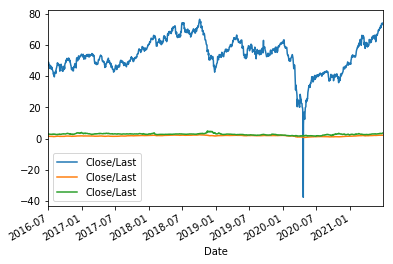

In [29]:
pd.DataFrame([all_commodities['crude_oil']['Close/Last'],all_commodities['heating_oil']['Close/Last'], all_commodities['natural_gas']['Close/Last']]).T.plot()

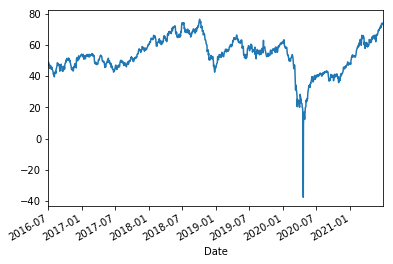

In [30]:
plt =all_commodities['crude_oil']['Close/Last'].plot()

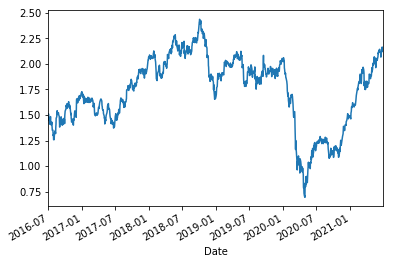

In [31]:
plt =all_commodities['heating_oil']['Close/Last'].plot()

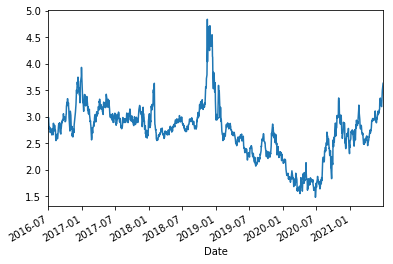

In [32]:
plt =all_commodities['natural_gas']['Close/Last'].plot()

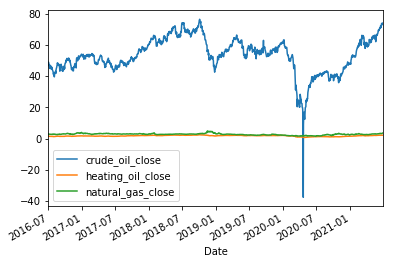

In [33]:
close_last = pd.DataFrame({'crude_oil_close': all_commodities['crude_oil']['Close/Last'],'heating_oil_close': all_commodities['heating_oil']['Close/Last'], 'natural_gas_close': all_commodities['natural_gas']['Close/Last']}).T

close_last.T.plot()

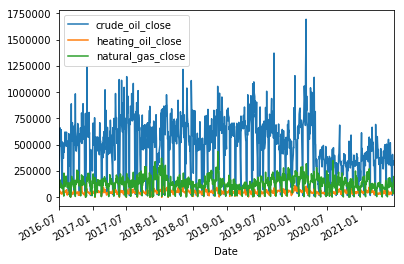

In [234]:
close_last_volume = pd.DataFrame({'crude_oil_close': all_commodities['crude_oil']['Volume'],'heating_oil_close': all_commodities['heating_oil']['Volume'], 'natural_gas_close': all_commodities['natural_gas']['Volume']})

close_last_volume.plot()

In [35]:
csvpath_corn=("../practice_merge/HistoricalData_corn(nasdaq).csv")
corn1_df = pd.read_csv(csvpath_corn, parse_dates=True, index_col="Date", infer_datetime_format=True)

#Display sample data
corn1_df.head()

Close/Last  Volume    Open    High     Low
Date                                                  
2021-06-28      675.25   64989  637.75  676.50  636.75
2021-06-25      636.50   92335  653.25  659.50  634.00
2021-06-24      653.25  118774  664.00  664.00  650.75
2021-06-23      664.25   92037  660.50  666.25  659.25
2021-06-22      659.75  109273  662.75  668.00  653.75

In [36]:
csvpath_lumber=("../practice_merge/HistoricalData_lumber(nasdaq).csv")
lumber1_df = pd.read_csv(csvpath_lumber, parse_dates=True, index_col="Date", infer_datetime_format=True)

#Display sample data
lumber1_df.head()

Close/Last  Volume   Open   High    Low
Date                                               
2021-06-28       797.3   483.0  774.0  805.0  721.9
2021-06-25       774.0   318.0  834.5  834.5  774.0
2021-06-24       837.0   280.0  883.7  917.2  837.0
2021-06-23       879.0   190.0  866.8  900.5  859.8
2021-06-22       866.4   344.0  896.9  920.5  860.0

In [37]:
csvpath_palmoil=("../practice_merge/HistoricalData_soyabean.csv")
soyabean1_df = pd.read_csv(csvpath_palmoil, parse_dates=True, index_col="Date", infer_datetime_format=True)

#Display sample data
soyabean1_df.head()

Close/Last    Volume     Open     High      Low
Date                                                       
2021-06-29     1310.25   79395.0  1325.25  1327.00  1298.00
2021-06-28     1312.50   94655.0  1269.75  1319.00  1267.00
2021-06-25     1269.75  108519.0  1290.75  1304.50  1259.75
2021-06-24     1291.75  103723.0  1298.75  1299.75  1261.75
2021-06-23     1300.25   78840.0  1300.25  1311.75  1293.75

In [38]:
print ("Corn (ZC) commodity has {} observations & {} features".format(*corn1_df.shape))
print ("Lumber (LBS) commodity has {} observations & {} features".format(*lumber1_df.shape))
print ("Soya bean (ZS) commodity has {} observations & {} features".format(*soyabean1_df.shape))

Corn (ZC) commodity has 1258 observations & 5 features
Lumber (LBS) commodity has 1258 observations & 5 features
Soya bean (ZS) commodity has 1259 observations & 5 features


In [39]:
corn1_df.isnull().sum()
lumber1_df.isnull().sum()
soyabean1_df.isnull().sum()

Close/Last    0
Volume        2
Open          0
High          0
Low           0
dtype: int64

In [40]:
corn1_df.describe()

Close/Last         Volume         Open         High          Low
count  1258.000000    1258.000000  1258.000000  1258.000000  1258.000000
mean    388.065580  125021.364070   387.892886   391.743839   384.385135
std      77.829565   85467.437117    77.543080    79.236690    75.973554
min     301.500000      28.000000   302.000000   307.250000   300.250000
25%     349.500000   74206.500000   349.250000   352.000000   346.500000
50%     366.750000  126116.500000   366.875000   370.000000   364.375000
75%     387.000000  175820.750000   386.750000   389.500000   384.187500
max     772.750000  482695.000000   766.750000   775.000000   756.750000

In [41]:
lumber1_df.describe()

Close/Last       Volume         Open         High          Low
count  1258.000000  1236.000000  1258.000000  1258.000000  1258.000000
mean    476.787838   428.346278   476.730207   483.824245   469.940700
std     223.607012   213.100751   223.884069   228.483282   219.019631
min     259.800000     2.000000   260.400000   265.600000   251.500000
25%     348.525000   269.750000   349.825000   354.625000   343.725000
50%     391.250000   396.500000   391.150000   396.650000   386.600000
75%     512.400000   537.250000   510.875000   517.875000   505.750000
max    1670.500000  1677.000000  1710.500000  1733.500000  1618.700000

In [42]:
soyabean1_df.describe()

Close/Last         Volume         Open         High          Low
count  1259.000000    1257.000000  1259.000000  1259.000000  1259.000000
mean    996.412828  105646.690533   996.427720  1004.874305   988.796068
std     162.190286   35021.451268   162.057537   164.389817   159.851299
min     802.500000    5386.000000   805.000000   807.000000   791.000000
25%     895.000000   81342.000000   895.500000   900.000000   888.375000
50%     954.250000   98871.000000   953.750000   961.250000   946.500000
75%    1024.250000  121942.000000  1024.125000  1034.750000  1015.250000
max    1642.500000  327585.000000  1621.000000  1667.500000  1615.250000

In [43]:
corn1_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2021-06-28 to 2016-06-29
Data columns (total 5 columns):
Close/Last    1258 non-null float64
Volume        1258 non-null int64
Open          1258 non-null float64
High          1258 non-null float64
Low           1258 non-null float64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [44]:
lumber1_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2021-06-28 to 2016-06-29
Data columns (total 5 columns):
Close/Last    1258 non-null float64
Volume        1236 non-null float64
Open          1258 non-null float64
High          1258 non-null float64
Low           1258 non-null float64
dtypes: float64(5)
memory usage: 59.0 KB


In [45]:
soyabean1_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2021-06-29 to 2016-06-29
Data columns (total 5 columns):
Close/Last    1259 non-null float64
Volume        1257 non-null float64
Open          1259 non-null float64
High          1259 non-null float64
Low           1259 non-null float64
dtypes: float64(5)
memory usage: 59.0 KB


In [46]:
corn_df = []
lumber_df =[]
soyabean_df =[]

# Slicing data into the new dataframe
corn_df = corn1_df[['Close/Last', 'Volume']]
lumber_df = lumber1_df[['Close/Last', 'Volume']]
soyabean_df = soyabean1_df[['Close/Last', 'Volume']]

# Display sample
soyabean_df.tail(5)

Close/Last    Volume
Date                            
2016-07-06     1073.25  166641.0
2016-07-05     1077.25  153685.0
2016-07-01     1137.50  103691.0
2016-06-30     1153.25  219688.0
2016-06-29     1112.50   98054.0

In [47]:
# Join the Corn database, Lumber database and Soya base database into a single datafram using 'concat' 
agriculture_df = pd.concat([corn_df, lumber_df, soyabean_df], axis=1, sort=True) 

#display sample data
agriculture_df.head()

Close/Last   Volume  Close/Last  Volume  Close/Last    Volume
Date                                                                     
2016-06-29      372.75  87901.0       307.7   217.0     1112.50   98054.0
2016-06-30      358.75  35074.0       307.7   265.0     1153.25  219688.0
2016-07-01      353.00   6565.0       315.0   393.0     1137.50  103691.0
2016-07-05      344.00   4662.0       322.8   905.0     1077.25  153685.0
2016-07-06      335.75   4133.0       321.6   463.0     1073.25  166641.0

In [48]:
# Assigning approprate new column names 
columns = ('Corn (ZC)', 'Corn_Vol', 'Lumber (LBS)', 'Lumber_Vol','Soya_bean (ZS)','Soya_bean_Vol')
agriculture_df.columns = columns

# Sorting the new database in Index column (Date)
agriculture_df.sort_index(inplace=True)

agriculture_df.head()

Corn (ZC)  Corn_Vol  Lumber (LBS)  Lumber_Vol  Soya_bean (ZS)  \
Date                                                                        
2016-06-29     372.75   87901.0         307.7       217.0         1112.50   
2016-06-30     358.75   35074.0         307.7       265.0         1153.25   
2016-07-01     353.00    6565.0         315.0       393.0         1137.50   
2016-07-05     344.00    4662.0         322.8       905.0         1077.25   
2016-07-06     335.75    4133.0         321.6       463.0         1073.25   

            Soya_bean_Vol  
Date                       
2016-06-29        98054.0  
2016-06-30       219688.0  
2016-07-01       103691.0  
2016-07-05       153685.0  
2016-07-06       166641.0

In [49]:
agri_price_df = agriculture_df[['Corn (ZC)', 'Lumber (LBS)', 'Soya_bean (ZS)']]
agri_price_df.head()

Corn (ZC)  Lumber (LBS)  Soya_bean (ZS)
Date                                               
2016-06-29     372.75         307.7         1112.50
2016-06-30     358.75         307.7         1153.25
2016-07-01     353.00         315.0         1137.50
2016-07-05     344.00         322.8         1077.25
2016-07-06     335.75         321.6         1073.25

In [50]:
agri_price_df.sort_index(inplace=True)

In [51]:
agri_vol_df = agriculture_df[['Corn_Vol','Lumber_Vol','Soya_bean_Vol']]

In [52]:
fig_agri_price = agri_price_df.hvplot(title='Price of Agricultural commodities (Corn, Lumber, Soya bean)', 
                   rot=90,
                   width = 750,
                    height = 400,
                   figsize=(15,10)
                  )

fig_agri_price  

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [53]:
# Data verification from main database  
agriculture_df.head()

Corn (ZC)  Corn_Vol  Lumber (LBS)  Lumber_Vol  Soya_bean (ZS)  \
Date                                                                        
2016-06-29     372.75   87901.0         307.7       217.0         1112.50   
2016-06-30     358.75   35074.0         307.7       265.0         1153.25   
2016-07-01     353.00    6565.0         315.0       393.0         1137.50   
2016-07-05     344.00    4662.0         322.8       905.0         1077.25   
2016-07-06     335.75    4133.0         321.6       463.0         1073.25   

            Soya_bean_Vol  
Date                       
2016-06-29        98054.0  
2016-06-30       219688.0  
2016-07-01       103691.0  
2016-07-05       153685.0  
2016-07-06       166641.0

Text(0, 0.5, 'Corn Volume')

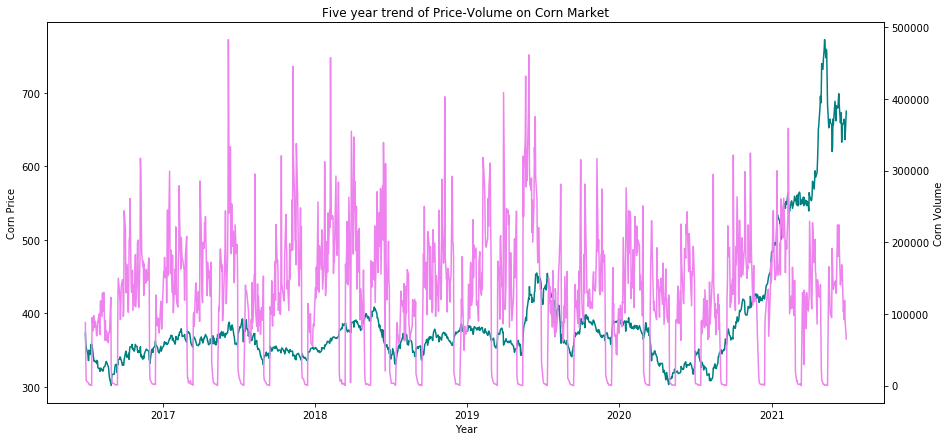

In [58]:
# Plotting Corn price and volume on two indices
fig_corn,ax = plt.subplots(figsize=(15,7))
ax.plot(agriculture_df.index, agriculture_df['Corn (ZC)'], color="teal")
ax.set_xlabel("Year")
ax.set_ylabel("Corn Price")
ax.set_title("Five year trend of Price-Volume on Corn Market")
ax2 = ax.twinx()
ax2.plot(agriculture_df.index, agriculture_df['Corn_Vol'],color="violet")
ax2.set_ylabel("Corn Volume")


Text(0, 0.5, 'Lumber Volume')

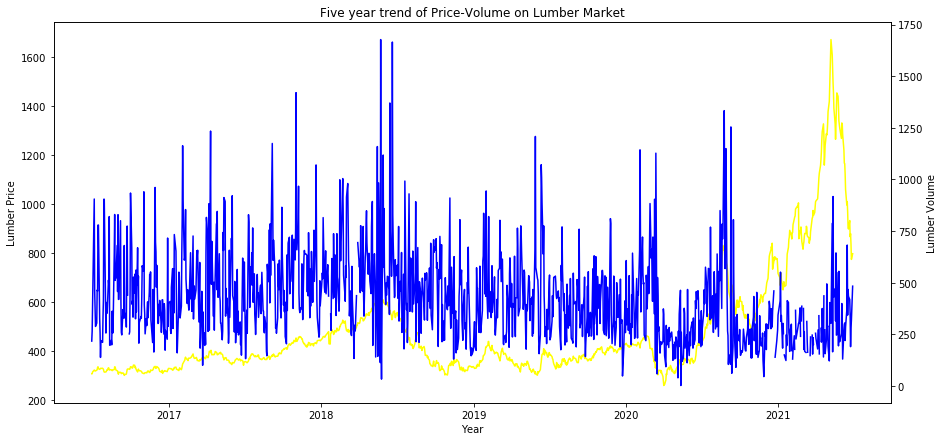

In [59]:
fig_lumber,ax = plt.subplots(figsize=(15,7))
ax.plot(agriculture_df.index, agriculture_df['Lumber (LBS)'], color="yellow")
ax.set_xlabel("Year")
ax.set_ylabel("Lumber Price")
ax.set_title("Five year trend of Price-Volume on Lumber Market")
ax2 = ax.twinx()
ax2.plot(agriculture_df.index, agriculture_df['Lumber_Vol'],color="blue")
ax2.set_ylabel("Lumber Volume")


Text(0, 0.5, 'Soya_bean Volume')

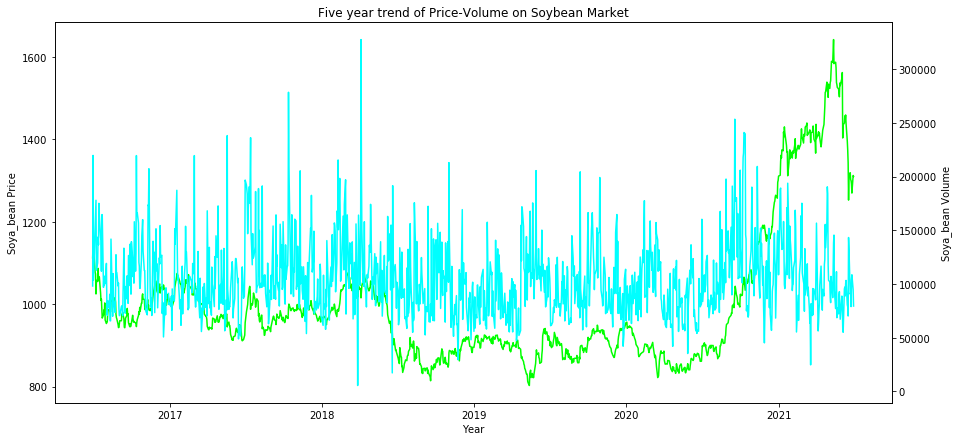

In [60]:
# Plotting Soya_bean price and volume on two indices
fig_soya,ax = plt.subplots(figsize=(15,7))
ax.plot(agriculture_df.index, agriculture_df['Soya_bean (ZS)'], color="lime")
ax.set_xlabel("Year")
ax.set_ylabel("Soya_bean Price")
ax.set_title("Five year trend of Price-Volume on Soybean Market")
ax2 = ax.twinx()
ax2.plot(agriculture_df.index, agriculture_df['Soya_bean_Vol'],color="aqua")
ax2.set_ylabel("Soya_bean Volume")

In [61]:
# Daily returns
daily_returns_agri_price = agri_price_df.pct_change()
daily_returns_agri_price.head()


Corn (ZC)  Lumber (LBS)  Soya_bean (ZS)
Date                                               
2016-06-29        NaN           NaN             NaN
2016-06-30  -0.037559      0.000000        0.036629
2016-07-01  -0.016028      0.023724       -0.013657
2016-07-05  -0.025496      0.024762       -0.052967
2016-07-06  -0.023983     -0.003717       -0.003713

In [62]:
moving_avg_agri = daily_returns_agri_price.rolling(window=30).mean()

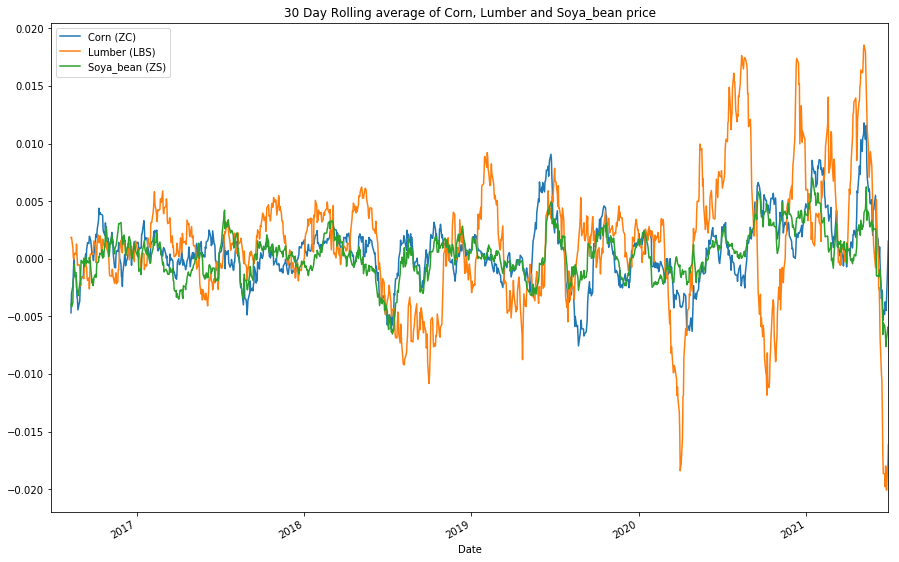

In [63]:
moving_avg_agri.plot(figsize=(15,10), title='30 Day Rolling average of Corn, Lumber and Soya_bean price')

In [64]:
#agri_price_df.groupby(pd.Grouper(key='Date',freq='M')).mean()
agri_price_by_year = agri_price_df.groupby([agri_price_df.index.year]).first()
agri_price_by_year

Corn (ZC)  Lumber (LBS)  Soya_bean (ZS)
Date                                         
2016     372.75         307.7         1112.50
2017     355.75         329.1          995.00
2018     353.25         449.5          964.75
2019     375.75         333.2          907.00
2020     391.50         431.8          956.25
2021     483.75         700.6         1313.00

In [65]:
#Plotting Price by year
plot = agri_price_by_year.hvplot.bar(rot=90, width=700, height = 600).opts(yformatter="%.0f")
plot

:Bars   [Date,Variable]   (value)

In [90]:
# Read Vaccination csv data
csvpath_vaccine=("../practice_merge/share-people-fully-vaccinated-covid.csv")
vaccine_data_df = pd.read_csv(csvpath_vaccine, parse_dates=True, index_col="Day", infer_datetime_format=True)
vaccine_data_df.head(5)

Entity Code  people_fully_vaccinated_per_hundred  \
Day                                                                 
2021-05-11  Afghanistan  AFG                                 0.14   
2021-05-20  Afghanistan  AFG                                 0.20   
2021-05-24  Afghanistan  AFG                                 0.25   
2021-05-26  Afghanistan  AFG                                 0.29   
2021-05-27  Afghanistan  AFG                                 0.29   

           145609-annotations  
Day                            
2021-05-11                NaN  
2021-05-20                NaN  
2021-05-24                NaN  
2021-05-26                NaN  
2021-05-27                NaN

In [91]:
# Dropping column '145609-annotations'
vaccine_data_df = vaccine_data_df.drop(columns=['145609-annotations'])
vaccine_data_df.head()

Entity Code  people_fully_vaccinated_per_hundred
Day                                                              
2021-05-11  Afghanistan  AFG                                 0.14
2021-05-20  Afghanistan  AFG                                 0.20
2021-05-24  Afghanistan  AFG                                 0.25
2021-05-26  Afghanistan  AFG                                 0.29
2021-05-27  Afghanistan  AFG                                 0.29

In [92]:
# Assigning column names
columns = ('Country', 'Country Code', 'People Vaccinated per 100')
vaccine_data_df.columns = columns
vaccine_data_df.head()

Country Country Code  People Vaccinated per 100
Day                                                            
2021-05-11  Afghanistan          AFG                       0.14
2021-05-20  Afghanistan          AFG                       0.20
2021-05-24  Afghanistan          AFG                       0.25
2021-05-26  Afghanistan          AFG                       0.29
2021-05-27  Afghanistan          AFG                       0.29

In [93]:
# Vaccine Data by country
plot = vaccine_data_df.hvplot.bar(groupby='Country', rot=90, width=700, height = 600).opts(yformatter="%.0f")
plot

:DynamicMap   [Country]
   :Bars   [Day]   (People Vaccinated per 100)

In [94]:
vaccine_by_mth1 = vaccine_data_df.groupby([vaccine_data_df['Country'], vaccine_data_df.index.year, vaccine_data_df.index.month]).mean()
vaccine_by_mth1.index.names = ['Country', 'Year', 'Month']
vaccine_by_mth1.reset_index(inplace=True)
vaccine_by_mth1.head()

Country  Year  Month  People Vaccinated per 100
0  Afghanistan  2021      5                   0.246667
1  Afghanistan  2021      6                   0.435714
2       Africa  2021      2                   0.003750
3       Africa  2021      3                   0.150968
4       Africa  2021      4                   0.340000

In [95]:
# Replace Month value with string discription
vaccine_by_mth = vaccine_by_mth1.replace({'Month': {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}})
vaccine_by_mth.head()

Country  Year Month  People Vaccinated per 100
0  Afghanistan  2021   May                   0.246667
1  Afghanistan  2021   Jun                   0.435714
2       Africa  2021   Feb                   0.003750
3       Africa  2021   Mar                   0.150968
4       Africa  2021   Apr                   0.340000

In [96]:
# Sortin the datafram
vaccine_by_mth.sort_values(by='People Vaccinated per 100').head()

Country  Year Month  People Vaccinated per 100
228  Faeroe Islands  2021   Jan                        0.0
743         Ukraine  2021   Apr                        0.0
742         Ukraine  2021   Mar                        0.0
786           World  2020   Dec                        0.0
444        Malaysia  2021   Feb                        0.0

In [97]:
# Datafram slicing for recodes with data and soring 
vaccine_by_mth2 = []
vaccine_by_mth2 = vaccine_by_mth.loc[(vaccine_by_mth!=0).all(1)]
vaccine_by_mth2.sort_values(by='People Vaccinated per 100')

Country  Year Month  People Vaccinated per 100
761           Upper middle income  2021   Jan                   0.001176
169  Democratic Republic of Congo  2021   Jun                   0.002000
105                      Cambodia  2021   Feb                   0.002500
426                    Low income  2021   Apr                   0.003103
2                          Africa  2021   Feb                   0.003750
548                       Oceania  2021   Feb                   0.004000
289                     Guatemala  2021   Mar                   0.004000
336                     Indonesia  2021   Jan                   0.005000
741                        Uganda  2021   May                   0.006667
676                 South America  2021   Jan                   0.007368
682                   South Korea  2021   Mar                   0.009167
196                       England  2020   Dec                   0.010000
412                       Lesotho  2021   May                   0.010000
505                   Netherlands  2021   Jan                   0.010000
570              Papua New Guinea  2021   Jun                   0.010000
396                    Kyrgyzstan  2021   Apr                   0.010000
385                    Kazakhstan  2021   Feb                   0.010000
774                       Vietnam  2021   Apr                   0.010000
290                     Guatemala  2021   Apr                   0.010000
777                         Wales  2021   Jan                   0.012500
186                       Ecuador  2021   Feb                   0.015000
464                        Mexico  2021   Jan                   0.015294
7                         Albania  2021   Feb                   0.016000
139                    Costa Rica  2021   Jan                   0.016667
243                        France  2021   Jan                   0.016875
686                   South Sudan  2021   Jun                   0.017500
571                      Paraguay  2021   Mar                   0.018235
110                      Cameroon  2021   May                   0.018333
523                       Nigeria  2021   May                   0.018571
413                       Liberia  2021   Jun                   0.018571
..                            ...   ...   ...                        ...
324                       Hungary  2021   Jun                  44.540909
630                      Scotland  2021   Jun                  45.044828
782                         Wales  2021   Jun                  45.062069
202                       England  2021   Jun                  45.101786
156                       Curacao  2021   Jun                  45.508667
130                         Chile  2021   Jun                  48.256071
78                        Bermuda  2021   May                  48.744000
479                      Mongolia  2021   Jun                  49.049545
360                        Israel  2021   Mar                  49.277097
234              Falkland Islands  2021   Apr                  50.130000
379                        Jersey  2021   Jun                  50.374286
640                    Seychelles  2021   Apr                  50.473333
620                    San Marino  2021   May                  50.510000
31                          Aruba  2021   Jun                  51.956000
54                        Bahrain  2021   Jun                  52.004333
123                Cayman Islands  2021   May                  52.980000
361                        Israel  2021   Apr                  57.249333
79                        Bermuda  2021   Jun                  58.094000
612                  Saint Helena  2021   May                  58.160000
362                        Israel  2021   May                  58.909677
363                        Israel  2021   Jun                  59.482000
272                     Gibraltar  2021   Mar                  59.930667
459                         Malta  2021   Jun                  61.076552
641        

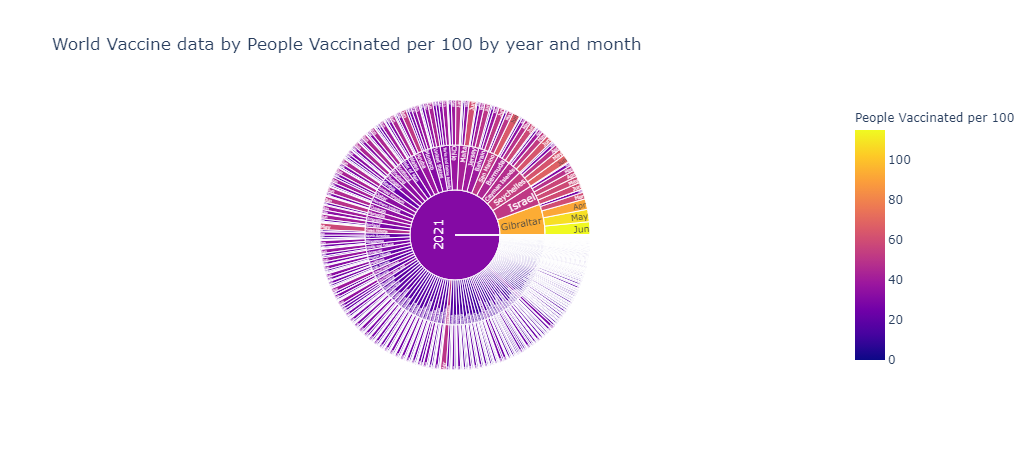

In [98]:
### Vaccine data by 2021 month 
vaccine_world = px.sunburst(vaccine_by_mth2, 
                  path=['Year','Country','Month'], 
                  values='People Vaccinated per 100',
                  color='People Vaccinated per 100', 
                  title = "World Vaccine data by People Vaccinated per 100 by year and month"
                  
                 )
vaccine_world.show()

In [222]:
# Reading market data - industrial metals
al_path = Path("../practice_merge/Aluminium.csv")
al = pd.read_csv(al_path, parse_dates = True, index_col="Date", infer_datetime_format = True)
co_path = Path("../practice_merge/Copper.csv")
co = pd.read_csv(co_path, parse_dates = True, index_col="Date", infer_datetime_format = True).dropna()
pa_path = Path("../practice_merge/Palladium.csv")
pa = pd.read_csv(pa_path, parse_dates = True, index_col="Date", infer_datetime_format = True).dropna()

In [223]:
# Creating individual data frames 
al_data = al[["Close/Last", "Volume"]]
co_data = co[["Close/Last", "Volume"]].dropna()
pa_data = pa[["Close/Last", "Volume"]].dropna()

In [224]:
al_data.tail()

Close/Last  Volume
Date                          
2016-07-13     1719.00       9
2016-07-12     1714.00      17
2016-07-11     1689.00      14
2016-07-08     1699.00       9
2016-07-05     1685.75       5

In [225]:
# Merging data bases
industrial_metals = pd.concat([al_data, co_data, pa_data] , axis = 1)
col = ('AL_price', 'AL_vol', 'CO_price', 'CO_vol', 'PA_price', 'PA_vol')
industrial_metals.columns = col
industrial_metals.head(5)

AL_price  AL_vol  CO_price  CO_vol  PA_price  PA_vol
Date                                                            
2016-07-05   1685.75     5.0    2.1835  107837    602.65  6697.0
2016-07-06       NaN     NaN    2.1535   69044    607.55  4213.0
2016-07-07       NaN     NaN    2.1235   52331    612.35  3570.0
2016-07-08   1699.00     9.0    2.1190   43312    617.10  4464.0
2016-07-11   1689.00    14.0    2.1475   50976    625.75  4000.0

In [226]:
# Creating data separate data frames
industrial_metals_price = industrial_metals[["AL_price", "CO_price", "PA_price"]]
industrial_metals_vol = industrial_metals[["AL_vol", "CO_vol", "PA_vol"]]

In [227]:
# Reading GDP data
gdp_per_capita_path = Path("GDP_per_capita.csv")
gdp_per_capita_original = pd.read_csv(gdp_per_capita_path, index_col = 'Country Code')
gdp_per_capita_original.head(2)
gdp_per_capita = (gdp_per_capita_original[["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]]).dropna()
gdp_per_capita.head(3)

2011         2012         2013         2014         2015  \
Country Code                                                                    
AFE           1682.287263  1667.992618  1648.867514  1654.314865  1503.859334   
AFG            591.162798   641.871438   637.165464   613.856505   578.466353   
AFW           1827.518347  1936.390962  2123.392433  2166.743309  1886.248158   

                     2016         2017         2018         2019         2020  
Country Code                                                                   
AFE           1401.281053  1536.206783  1530.161917  1481.425292  1326.663658  
AFG            509.220101   519.888913   493.756581   507.103392   508.808409  
AFW           1666.422406  1606.978332  1695.959215  1772.339155  1714.426800

In [230]:
# Graph Analysis
industrial_metals_vol.head(30)

AL_vol  CO_vol  PA_vol
Date                              
2016-07-05     5.0  107837  6697.0
2016-07-06     NaN   69044  4213.0
2016-07-07     NaN   52331  3570.0
2016-07-08     9.0   43312  4464.0
2016-07-11    14.0   50976  4000.0
2016-07-12    17.0   71214  4739.0
2016-07-13     9.0   94274  6618.0
2016-07-14     6.0   52471  5011.0
2016-07-15    14.0   62183  3672.0
2016-07-18     1.0   73415  3648.0
2016-07-19     4.0   61204  4034.0
2016-07-20     6.0   62039  5949.0
2016-07-21    12.0   52372  5224.0
2016-07-22    30.0   64097  3790.0
2016-07-25     3.0   58211  4384.0
2016-07-26    10.0   49288  4282.0
2016-07-27    14.0   65210  5415.0
2016-07-28     NaN   54382  4131.0
2016-07-29     NaN   57421  5886.0
2016-08-01    10.0   61008  4167.0
2016-08-02     NaN   70359  4488.0
2016-08-03    17.0   69701  5181.0
2016-08-04    12.0   68364  4883.0
2016-08-05     NaN   50256  5397.0
2016-08-08     5.0   54068  3859.0
2016-08-09     NaN   54371  3351.0
2016-08-10     NaN   79070  8800.0
2016-08-11     NaN   47664  6430.0
2016-08-12     NaN   23341  4317.0
2016-08-15     NaN   14359  2962.0

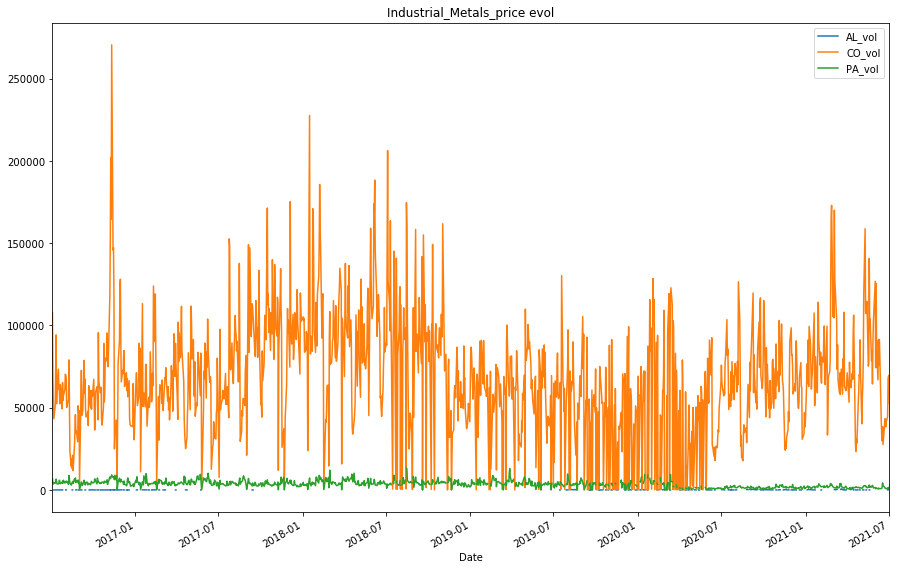

In [231]:
industrial_metals_vol.plot(title = "Industrial_Metals_price evol", figsize = (15,10))

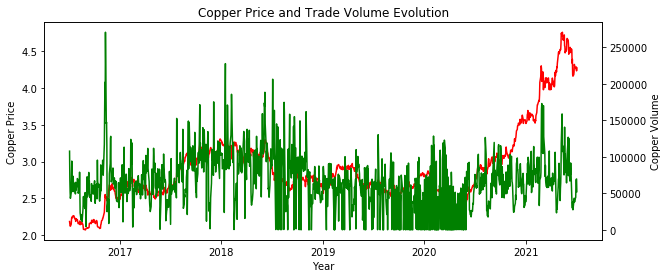

In [106]:
## Market Analysis - Copper 

fig_copper,ax = plt.subplots(figsize=(10,4))
ax.plot(co_data.index,co_data["Close/Last"], color="red")
ax.set_xlabel("Year")
ax.set_ylabel("Copper Price")
ax.set_title("Copper Price and Trade Volume Evolution")
ax2 = ax.twinx()
ax2.plot(co_data.index, co_data["Volume"],color="green")
ax2.set_ylabel("Copper Volume")
plt.show()

In [107]:
# GDP trend main Copper producers in the world - Chile, China, Peru, US 
co_exporters = gdp_per_capita.loc[['CHN', 'CHL', 'PER', 'WLD']]
co_exporters.head()

2011          2012          2013          2014  \
Country Code                                                           
CHN            5618.132267   6316.918318   7050.646271   7678.599486   
CHL           14637.233440  15351.540740  15842.936480  14670.988910   
PER            5869.323882   6528.971775   6756.752996   6672.877373   
WLD           10493.169850  10606.357620  10783.681240  10951.690610   

                      2015          2016          2017          2018  \
Country Code                                                           
CHN            8066.942635   8147.937705   8879.438667   9976.677137   
CHL           13574.169240  13753.592150  14998.817060  15888.144360   
PER            6229.100674   6204.996457   6710.507602   6957.793411   
WLD           10251.020480  10294.189710  10834.344340  11372.727330   

                      2019         2020  
Country Code                             
CHN           10216.630330  10500.39562  
CHL           14741.714400  13231.70421  
PER            7027.612207   6126.87454  
WLD           11417.174060  10925.74607

In [108]:
co_exporters = co_exporters.T
co_exporters

Country Code           CHN          CHL          PER          WLD
2011           5618.132267  14637.23344  5869.323882  10493.16985
2012           6316.918318  15351.54074  6528.971775  10606.35762
2013           7050.646271  15842.93648  6756.752996  10783.68124
2014           7678.599486  14670.98891  6672.877373  10951.69061
2015           8066.942635  13574.16924  6229.100674  10251.02048
2016           8147.937705  13753.59215  6204.996457  10294.18971
2017           8879.438667  14998.81706  6710.507602  10834.34434
2018           9976.677137  15888.14436  6957.793411  11372.72733
2019          10216.630330  14741.71440  7027.612207  11417.17406
2020          10500.395620  13231.70421  6126.874540  10925.74607

In [109]:
co_exporters.shape
co_exporters.head()

Country Code          CHN          CHL          PER          WLD
2011          5618.132267  14637.23344  5869.323882  10493.16985
2012          6316.918318  15351.54074  6528.971775  10606.35762
2013          7050.646271  15842.93648  6756.752996  10783.68124
2014          7678.599486  14670.98891  6672.877373  10951.69061
2015          8066.942635  13574.16924  6229.100674  10251.02048

In [110]:
plot_co_exporters = co_exporters.hvplot.line(title = "Copper Exporting Countries - GDP per Capita")
plot_co_exporters

:NdOverlay   [Country Code]
   :Curve   [index]   (value)

In [116]:
# Covid vaccination on Copper producing countries

vaccine_df_2 = vaccine_data_df.set_index(['Country'])
vaccine_co = vaccine_df_2.loc[['China', 'Chile', 'Peru']]
vaccine_co.head()

Country Code  People Vaccinated per 100
Country                                        
China            CHN                      15.51
Chile            CHL                       0.01
Chile            CHL                       0.03
Chile            CHL                       0.04
Chile            CHL                       0.04

In [117]:
plot_vaccine_co = vaccine_co.hvplot.bar(
    xlabel = "Country", 
    ylabel = "% Fully Vaccinated People", 
    title = "Copper Producing Countries Vaccine Evolution",
    rot = 90, height =500)
plot_vaccine_co

:Bars   [Country]   (People Vaccinated per 100)

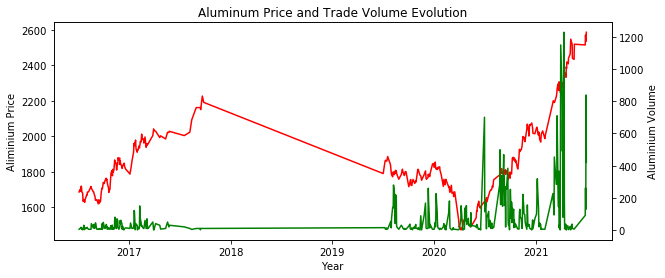

In [232]:
## Market Analysis - Aluminium

fig_aluminum,ax = plt.subplots(figsize=(10,4))
ax.plot(al_data.index,al_data["Close/Last"], color="red")
ax.set_xlabel("Year")
ax.set_ylabel("Aliminium Price")
ax.set_title("Aluminum Price and Trade Volume Evolution")
ax2 = ax.twinx()
ax2.plot(al_data.index, al_data["Volume"],color="green")
ax2.set_ylabel("Aluminium Volume")
plt.show()

In [122]:
# GDP trend main Aluminium producers in the world - Chile, China, Peru, US 
al_exporters = gdp_per_capita.loc[['CHN', 'IND', 'RUS', 'WLD']]
al_exporters.head()

2011          2012          2013          2014  \
Country Code                                                           
CHN            5618.132267   6316.918318   7050.646271   7678.599486   
IND            1458.104066   1443.882435   1449.610451   1573.885642   
RUS           14311.084320  15420.874540  15974.644630  14095.648740   
WLD           10493.169850  10606.357620  10783.681240  10951.690610   

                      2015          2016          2017          2018  \
Country Code                                                           
CHN            8066.942635   8147.937705   8879.438667   9976.677137   
IND            1605.605445   1732.554242   1980.667020   1996.915087   
RUS            9313.013625   8704.898413  10720.332660  11287.355280   
WLD           10251.020480  10294.189710  10834.344340  11372.727330   

                      2019         2020  
Country Code                             
CHN           10216.630330  10500.39562  
IND            2100.751461   1900.70681  
RUS           11497.649250  10126.72179  
WLD           11417.174060  10925.74607

In [123]:
al_exporters = al_exporters.T
al_exporters

Country Code           CHN          IND           RUS          WLD
2011           5618.132267  1458.104066  14311.084320  10493.16985
2012           6316.918318  1443.882435  15420.874540  10606.35762
2013           7050.646271  1449.610451  15974.644630  10783.68124
2014           7678.599486  1573.885642  14095.648740  10951.69061
2015           8066.942635  1605.605445   9313.013625  10251.02048
2016           8147.937705  1732.554242   8704.898413  10294.18971
2017           8879.438667  1980.667020  10720.332660  10834.34434
2018           9976.677137  1996.915087  11287.355280  11372.72733
2019          10216.630330  2100.751461  11497.649250  11417.17406
2020          10500.395620  1900.706810  10126.721790  10925.74607

In [124]:
al_exporters.shape
al_exporters.head()

Country Code          CHN          IND           RUS          WLD
2011          5618.132267  1458.104066  14311.084320  10493.16985
2012          6316.918318  1443.882435  15420.874540  10606.35762
2013          7050.646271  1449.610451  15974.644630  10783.68124
2014          7678.599486  1573.885642  14095.648740  10951.69061
2015          8066.942635  1605.605445   9313.013625  10251.02048

In [125]:
plot_al_exporters = al_exporters.hvplot.line(title = "Aluminium Exporting Countries - GDP per Capita")
plot_al_exporters

:NdOverlay   [Country Code]
   :Curve   [index]   (value)

In [129]:
# Covid vaccination on Aluminium producing countries

vaccine_df_2 = vaccine_data_df.set_index(['Country'])
vaccine_al = vaccine_df_2.loc[['China', 'Russia', 'India']]
vaccine_al.head()

Country Code  People Vaccinated per 100
Country                                        
China            CHN                      15.51
Russia           RUS                       0.75
Russia           RUS                       0.82
Russia           RUS                       0.90
Russia           RUS                       0.96

In [130]:
plot_vaccine_al = vaccine_al.hvplot.bar(
    xlabel = "Country", 
    ylabel = "% Fully Vaccinated People", 
    title = "Aluminium Producing Countries Vaccine Evolution",
    rot = 90, height =500)
plot_vaccine_al

:Bars   [Country]   (People Vaccinated per 100)

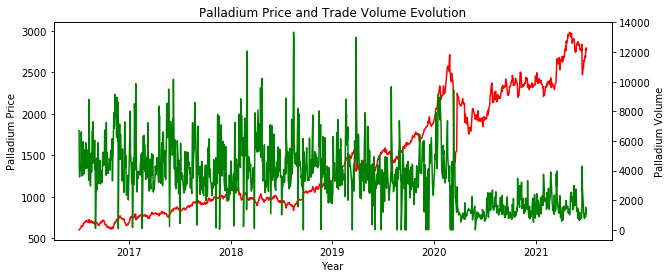

In [131]:
## Market Analysis - Palladium

fig_palladium,ax = plt.subplots(figsize=(10,4))
ax.plot(pa_data.index,pa_data["Close/Last"], color="red")
ax.set_xlabel("Year")
ax.set_ylabel("Palladium Price")
ax.set_title("Palladium Price and Trade Volume Evolution")
ax2 = ax.twinx()
ax2.plot(pa_data.index, pa_data["Volume"],color="green")
ax2.set_ylabel("Palladium Volume")
plt.show()

In [132]:
# GDP trend main Palladium producers in the world 
pa_exporters = gdp_per_capita.loc[['USA', 'ZAF', 'RUS', 'CAN', 'WLD']]
pa_exporters.head()

2011          2012          2013          2014  \
Country Code                                                           
USA           49882.558130  51602.931050  53106.536770  55049.988330   
ZAF            8007.476439   7501.661096   6832.725546   6433.400402   
RUS           14311.084320  15420.874540  15974.644630  14095.648740   
CAN           52223.696110  52669.089960  52635.174960  50955.998320   
WLD           10493.169850  10606.357620  10783.681240  10951.690610   

                      2015          2016         2017          2018  \
Country Code                                                          
USA           56863.371500  58021.400500  60109.65573  63064.418410   
ZAF            5734.633422   5272.543648   6131.47945   6372.605655   
RUS            9313.013625   8704.898413  10720.33266  11287.355280   
CAN           43596.135540  42315.603710  45129.35644  46453.901870   
WLD           10251.020480  10294.189710  10834.34434  11372.727330   

                      2019          2020  
Country Code                              
USA           65279.529030  63543.577790  
ZAF            6001.401121   5090.715025  
RUS           11497.649250  10126.721790  
CAN           46326.672640  43241.617830  
WLD           11417.174060  10925.746070

In [125]:
pa_exporters = pa_exporters.T
pa_exporters

Country Code          USA          ZAF           RUS          CAN          WLD
2011          49882.55813  8007.476439  14311.084320  52223.69611  10493.16985
2012          51602.93105  7501.661096  15420.874540  52669.08996  10606.35762
2013          53106.53677  6832.725546  15974.644630  52635.17496  10783.68124
2014          55049.98833  6433.400402  14095.648740  50955.99832  10951.69061
2015          56863.37150  5734.633422   9313.013625  43596.13554  10251.02048
2016          58021.40050  5272.543648   8704.898413  42315.60371  10294.18971
2017          60109.65573  6131.479450  10720.332660  45129.35644  10834.34434
2018          63064.41841  6372.605655  11287.355280  46453.90187  11372.72733
2019          65279.52903  6001.401121  11497.649250  46326.67264  11417.17406
2020          63543.57779  5090.715025  10126.721790  43241.61783  10925.74607

In [126]:
plot_pa_exporters = pa_exporters.hvplot.line(title = "Palladium Exporting Countries - GDP per Capita")
plot_pa_exporters

:NdOverlay   [Country Code]
   :Curve   [index]   (value)

In [135]:
# Covid vaccination on Palladium producing countries

vaccine_df_2 = vaccine_data_df.set_index(['Country'])
vaccine_pa = vaccine_df_2.loc[['Canada', 'Russia', 'United States', 'South Africa']]
vaccine_pa.head()

Country Code  People Vaccinated per 100
Country                                        
Canada           CAN                       0.00
Canada           CAN                       0.00
Canada           CAN                       0.01
Canada           CAN                       0.01
Canada           CAN                       0.01

In [136]:
plot_vaccine_pa = vaccine_pa.hvplot.bar(
    xlabel = "Country", 
    ylabel = "% Fully Vaccinated People", 
    title = "Palladium Producing Countries Vaccine Evolution",
    rot = 90, height =500)
plot_vaccine_pa

:Bars   [Country]   (People Vaccinated per 100)

In [137]:
# Read csv historical data for Corn (ZC)
csvpath_gdp=('../practice_merge/gdp_per_capita.csv')
#gdp_df = pd.read_csv(csvpath_gdp, parse_dates=True, index_col="Discovery Date", infer_datetime_format=True)
gdp1_df = pd.read_csv(csvpath_gdp)

In [138]:
#Display sample data
gdp1_df.head()

Country Name Country Code                Indicator Name  \
0                        Aruba          ABW  GDP per capita (current US$)   
1  Africa Eastern and Southern          AFE  GDP per capita (current US$)   
2                  Afghanistan          AFG  GDP per capita (current US$)   
3   Africa Western and Central          AFW  GDP per capita (current US$)   
4                       Angola          AGO  GDP per capita (current US$)   

   Indicator Code        1960        1961        1962        1963        1964  \
0  NY.GDP.PCAP.CD         NaN         NaN         NaN         NaN         NaN   
1  NY.GDP.PCAP.CD  127.651518  130.353643  134.693838  142.159769  150.881897   
2  NY.GDP.PCAP.CD         NaN         NaN   58.458009   78.706429   82.095307   
3  NY.GDP.PCAP.CD  107.963779  113.114697  118.865837  123.478967  131.892939   
4  NY.GDP.PCAP.CD         NaN         NaN         NaN         NaN         NaN   

         1965  ...          2011          2012          2013          2014  \
0         NaN  ...  24985.013920  24712.493260  26441.619940  26893.011510   
1  161.073294  ...   1682.287263   1667.992618   1648.867514   1654.314865   
2  101.108325  ...    591.162798    641.871438    637.165464    613.856505   
3  138.566819  ...   1827.518347   1936.390962   2123.392433   2166.743309   
4         NaN  ...   4615.468219   5100.097027   5254.881126   5408.411700   

           2015          2016          2017          2018         2019  \
0  28396.908420  28452.170610  29350.805020  30253.279360          NaN   
1   1503.859334   1401.281053   1536.206783   1530.161917  1481.425292   
2    578.466353    509.220101    519.888913    493.756581   507.103392   
3   1886.248158   1666.422406   1606.978332   1695.959215  1772.339155   
4   4166.979833   3506.073128   4095.810057   3289.643995  2809.626088   

          2020  
0          NaN  
1  1326.663658  
2   508.808409  
3  1714.426800  
4  1895.770869  

[5 rows x 65 columns]

In [140]:
# Data slicing for GDP related to 2011 to 2020 
gdp_df = []
gdp_df = gdp1_df[['Country Name','2011' , '2012' ,'2013' ,'2014' ,'2015' ,'2016' ,'2017' ,'2018' ,'2019' ,'2020']]
# Reading sample data
gdp_df.head()

Country Name          2011          2012          2013  \
0                        Aruba  24985.013920  24712.493260  26441.619940   
1  Africa Eastern and Southern   1682.287263   1667.992618   1648.867514   
2                  Afghanistan    591.162798    641.871438    637.165464   
3   Africa Western and Central   1827.518347   1936.390962   2123.392433   
4                       Angola   4615.468219   5100.097027   5254.881126   

           2014          2015          2016          2017          2018  \
0  26893.011510  28396.908420  28452.170610  29350.805020  30253.279360   
1   1654.314865   1503.859334   1401.281053   1536.206783   1530.161917   
2    613.856505    578.466353    509.220101    519.888913    493.756581   
3   2166.743309   1886.248158   1666.422406   1606.978332   1695.959215   
4   5408.411700   4166.979833   3506.073128   4095.810057   3289.643995   

          2019         2020  
0          NaN          NaN  
1  1481.425292  1326.663658  
2   507.103392   508.808409  
3  1772.339155  1714.426800  
4  2809.626088  1895.770869

In [141]:
# Reading GDP data in to a new DataFrame for Corn producing countries 
gdp_corn=[]
gdp_corn = gdp_df[(gdp_df["Country Name"] == "United States") 
                 |(gdp_df["Country Name"] == "China")
                 |(gdp_df["Country Name"] == "Brazil")
                 |(gdp_df["Country Name"] == "Argentina")
                 |(gdp_df["Country Name"] == "Ukraine")
                 |(gdp_df["Country Name"] == "India")
                 ]
           
gdp_corn

Country Name          2011          2012          2013          2014  \
9        Argentina  12848.864200  13082.664330  13080.254730  12334.798250   
29          Brazil  13245.612030  12370.024450  12300.324820  12112.587670   
40           China   5618.132267   6316.918318   7050.646271   7678.599486   
109          India   1458.104066   1443.882435   1449.610451   1573.885642   
248        Ukraine   3569.758121   3855.417729   4029.711252   3104.643206   
251  United States  49882.558130  51602.931050  53106.536770  55049.988330   

             2015          2016          2017          2018          2019  \
9    13789.060420  12790.242470  14613.041820  11633.498010   9912.281809   
29    8814.001418   8710.096774   9928.643063   9151.445253   8897.487770   
40    8066.942635   8147.937705   8879.438667   9976.677137  10216.630330   
109   1605.605445   1732.554242   1980.667020   1996.915087   2100.751461   
248   2124.662319   2187.730510   2640.675677   3096.817402   3662.563087   
251  56863.371500  58021.400500  60109.655730  63064.418410  65279.529030   

             2020  
9     8441.919439  
29    6796.844542  
40   10500.395620  
109   1900.706810  
248   3726.927149  
251  63543.577790

In [142]:
# Transposing the datafram for rows and columns
corn_gdp1 = gdp_corn.transpose()
corn_gdp1

9        29       40       109      248            251
Country Name  Argentina   Brazil    China    India  Ukraine  United States
2011            12848.9  13245.6  5618.13   1458.1  3569.76        49882.6
2012            13082.7    12370  6316.92  1443.88  3855.42        51602.9
2013            13080.3  12300.3  7050.65  1449.61  4029.71        53106.5
2014            12334.8  12112.6   7678.6  1573.89  3104.64          55050
2015            13789.1     8814  8066.94  1605.61  2124.66        56863.4
2016            12790.2   8710.1  8147.94  1732.55  2187.73        58021.4
2017              14613  9928.64  8879.44  1980.67  2640.68        60109.7
2018            11633.5  9151.45  9976.68  1996.92  3096.82        63064.4
2019            9912.28  8897.49  10216.6  2100.75  3662.56        65279.5
2020            8441.92  6796.84  10500.4  1900.71  3726.93        63543.6

In [143]:
# Assigning column names
columns = ('Argentina', 'Brazil' , 'China', 'India', 'Ukraine', 'United States')
corn_gdp1.columns = columns
corn_gdp1

Argentina   Brazil    China    India  Ukraine  United States
Country Name  Argentina   Brazil    China    India  Ukraine  United States
2011            12848.9  13245.6  5618.13   1458.1  3569.76        49882.6
2012            13082.7    12370  6316.92  1443.88  3855.42        51602.9
2013            13080.3  12300.3  7050.65  1449.61  4029.71        53106.5
2014            12334.8  12112.6   7678.6  1573.89  3104.64          55050
2015            13789.1     8814  8066.94  1605.61  2124.66        56863.4
2016            12790.2   8710.1  8147.94  1732.55  2187.73        58021.4
2017              14613  9928.64  8879.44  1980.67  2640.68        60109.7
2018            11633.5  9151.45  9976.68  1996.92  3096.82        63064.4
2019            9912.28  8897.49  10216.6  2100.75  3662.56        65279.5
2020            8441.92  6796.84  10500.4  1900.71  3726.93        63543.6

In [144]:
# Dropping the row with 'Country Name'
corn_gdp2 = corn_gdp1.drop(index='Country Name')
corn_gdp2

Argentina   Brazil    China    India  Ukraine United States
2011   12848.9  13245.6  5618.13   1458.1  3569.76       49882.6
2012   13082.7    12370  6316.92  1443.88  3855.42       51602.9
2013   13080.3  12300.3  7050.65  1449.61  4029.71       53106.5
2014   12334.8  12112.6   7678.6  1573.89  3104.64         55050
2015   13789.1     8814  8066.94  1605.61  2124.66       56863.4
2016   12790.2   8710.1  8147.94  1732.55  2187.73       58021.4
2017     14613  9928.64  8879.44  1980.67  2640.68       60109.7
2018   11633.5  9151.45  9976.68  1996.92  3096.82       63064.4
2019   9912.28  8897.49  10216.6  2100.75  3662.56       65279.5
2020   8441.92  6796.84  10500.4  1900.71  3726.93       63543.6

In [145]:
# Plotting GDP data fro top 6 countries producing Corn
plot_corn = corn_gdp2.hvplot.line(title = 'GDP of top 6 Corn producing countries',rot=90)
plot_corn

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [146]:
# Reading GDP data in to a new DataFrame for Corn producing countries 
gdp_lumber=[]
gdp_lumber = gdp_df[(gdp_df["Country Name"] == "United States") 
                 |(gdp_df["Country Name"] == "China")
                 |(gdp_df["Country Name"] == "Brazil")
                 |(gdp_df["Country Name"] == "Russian Federation")
                 |(gdp_df["Country Name"] == "Canada")
                 |(gdp_df["Country Name"] == "India")
                 ]
                 
gdp_lumber

Country Name          2011          2012          2013  \
29               Brazil  13245.612030  12370.024450  12300.324820   
35               Canada  52223.696110  52669.089960  52635.174960   
40                China   5618.132267   6316.918318   7050.646271   
109               India   1458.104066   1443.882435   1449.610451   
202  Russian Federation  14311.084320  15420.874540  15974.644630   
251       United States  49882.558130  51602.931050  53106.536770   

             2014          2015          2016          2017          2018  \
29   12112.587670   8814.001418   8710.096774   9928.643063   9151.445253   
35   50955.998320  43596.135540  42315.603710  45129.356440  46453.901870   
40    7678.599486   8066.942635   8147.937705   8879.438667   9976.677137   
109   1573.885642   1605.605445   1732.554242   1980.667020   1996.915087   
202  14095.648740   9313.013625   8704.898413  10720.332660  11287.355280   
251  55049.988330  56863.371500  58021.400500  60109.655730  63064.418410   

             2019          2020  
29    8897.487770   6796.844542  
35   46326.672640  43241.617830  
40   10216.630330  10500.395620  
109   2100.751461   1900.706810  
202  11497.649250  10126.721790  
251  65279.529030  63543.577790

In [147]:
# Transposing the datafram for rows and columns
lumber_gdp1 = gdp_lumber.transpose()
lumber_gdp1

29       35       40       109                 202  \
Country Name   Brazil   Canada    China    India  Russian Federation   
2011          13245.6  52223.7  5618.13   1458.1             14311.1   
2012            12370  52669.1  6316.92  1443.88             15420.9   
2013          12300.3  52635.2  7050.65  1449.61             15974.6   
2014          12112.6    50956   7678.6  1573.89             14095.6   
2015             8814  43596.1  8066.94  1605.61             9313.01   
2016           8710.1  42315.6  8147.94  1732.55              8704.9   
2017          9928.64  45129.4  8879.44  1980.67             10720.3   
2018          9151.45  46453.9  9976.68  1996.92             11287.4   
2019          8897.49  46326.7  10216.6  2100.75             11497.6   
2020          6796.84  43241.6  10500.4  1900.71             10126.7   

                        251  
Country Name  United States  
2011                49882.6  
2012                51602.9  
2013                53106.5  
2014                  55050  
2015                56863.4  
2016                58021.4  
2017                60109.7  
2018                63064.4  
2019                65279.5  
2020                63543.6

In [148]:
# Assigning column names
columns = ('Brazil' ,' Canada', 'China', 'India', 'Russia', 'United States')
lumber_gdp1.columns = columns
lumber_gdp1

Brazil   Canada    China    India              Russia  \
Country Name   Brazil   Canada    China    India  Russian Federation   
2011          13245.6  52223.7  5618.13   1458.1             14311.1   
2012            12370  52669.1  6316.92  1443.88             15420.9   
2013          12300.3  52635.2  7050.65  1449.61             15974.6   
2014          12112.6    50956   7678.6  1573.89             14095.6   
2015             8814  43596.1  8066.94  1605.61             9313.01   
2016           8710.1  42315.6  8147.94  1732.55              8704.9   
2017          9928.64  45129.4  8879.44  1980.67             10720.3   
2018          9151.45  46453.9  9976.68  1996.92             11287.4   
2019          8897.49  46326.7  10216.6  2100.75             11497.6   
2020          6796.84  43241.6  10500.4  1900.71             10126.7   

              United States  
Country Name  United States  
2011                49882.6  
2012                51602.9  
2013                53106.5  
2014                  55050  
2015                56863.4  
2016                58021.4  
2017                60109.7  
2018                63064.4  
2019                65279.5  
2020                63543.6

In [149]:
# Dropping the row with 'Country Name'
lumber_gdp2 = lumber_gdp1.drop(index='Country Name')
lumber_gdp2

Brazil   Canada    China    India   Russia United States
2011  13245.6  52223.7  5618.13   1458.1  14311.1       49882.6
2012    12370  52669.1  6316.92  1443.88  15420.9       51602.9
2013  12300.3  52635.2  7050.65  1449.61  15974.6       53106.5
2014  12112.6    50956   7678.6  1573.89  14095.6         55050
2015     8814  43596.1  8066.94  1605.61  9313.01       56863.4
2016   8710.1  42315.6  8147.94  1732.55   8704.9       58021.4
2017  9928.64  45129.4  8879.44  1980.67  10720.3       60109.7
2018  9151.45  46453.9  9976.68  1996.92  11287.4       63064.4
2019  8897.49  46326.7  10216.6  2100.75  11497.6       65279.5
2020  6796.84  43241.6  10500.4  1900.71  10126.7       63543.6

In [150]:
# Plotting GDP data fro top 6 countries producing Lumber
plot_lumber = lumber_gdp2.hvplot.line(title='GDP for top 6 Lumber producing countries', rot=90)
plot_lumber

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [151]:
# Reading GDP data in to a new DataFrame for Soybean producing countries 
gdp_soybean=[]
gdp_soybean = gdp_df[(gdp_df["Country Name"] == "United States") 
                 |(gdp_df["Country Name"] == "China")
                 |(gdp_df["Country Name"] == "Brazil")
                 |(gdp_df["Country Name"] == "Argentina")
                 |(gdp_df["Country Name"] == "Paraguay")
                 |(gdp_df["Country Name"] == "India")
                 ]
                 
gdp_soybean

Country Name          2011          2012          2013          2014  \
9        Argentina  12848.864200  13082.664330  13080.254730  12334.798250   
29          Brazil  13245.612030  12370.024450  12300.324820  12112.587670   
40           China   5618.132267   6316.918318   7050.646271   7678.599486   
109          India   1458.104066   1443.882435   1449.610451   1573.885642   
195       Paraguay   5329.387437   5185.141549   5936.975959   6118.318110   
251  United States  49882.558130  51602.931050  53106.536770  55049.988330   

             2015          2016          2017          2018          2019  \
9    13789.060420  12790.242470  14613.041820  11633.498010   9912.281809   
29    8814.001418   8710.096774   9928.643063   9151.445253   8897.487770   
40    8066.942635   8147.937705   8879.438667   9976.677137  10216.630330   
109   1605.605445   1732.554242   1980.667020   1996.915087   2100.751461   
195   5413.776021   5324.609068   5678.869972   5782.784550   5380.963322   
251  56863.371500  58021.400500  60109.655730  63064.418410  65279.529030   

             2020  
9     8441.919439  
29    6796.844542  
40   10500.395620  
109   1900.706810  
195   4949.749700  
251  63543.577790

In [152]:
# Transposing the datafram for rows and columns
soybean_gdp1 = gdp_soybean.transpose()
soybean_gdp1

9        29       40       109       195            251
Country Name  Argentina   Brazil    China    India  Paraguay  United States
2011            12848.9  13245.6  5618.13   1458.1   5329.39        49882.6
2012            13082.7    12370  6316.92  1443.88   5185.14        51602.9
2013            13080.3  12300.3  7050.65  1449.61   5936.98        53106.5
2014            12334.8  12112.6   7678.6  1573.89   6118.32          55050
2015            13789.1     8814  8066.94  1605.61   5413.78        56863.4
2016            12790.2   8710.1  8147.94  1732.55   5324.61        58021.4
2017              14613  9928.64  8879.44  1980.67   5678.87        60109.7
2018            11633.5  9151.45  9976.68  1996.92   5782.78        63064.4
2019            9912.28  8897.49  10216.6  2100.75   5380.96        65279.5
2020            8441.92  6796.84  10500.4  1900.71   4949.75        63543.6

In [153]:
# Assigning column names
columns = ('Argentina', 'Brazil' , 'China', 'India', 'Paraguay', 'United States')
soybean_gdp1.columns = columns
soybean_gdp1

Argentina   Brazil    China    India  Paraguay  United States
Country Name  Argentina   Brazil    China    India  Paraguay  United States
2011            12848.9  13245.6  5618.13   1458.1   5329.39        49882.6
2012            13082.7    12370  6316.92  1443.88   5185.14        51602.9
2013            13080.3  12300.3  7050.65  1449.61   5936.98        53106.5
2014            12334.8  12112.6   7678.6  1573.89   6118.32          55050
2015            13789.1     8814  8066.94  1605.61   5413.78        56863.4
2016            12790.2   8710.1  8147.94  1732.55   5324.61        58021.4
2017              14613  9928.64  8879.44  1980.67   5678.87        60109.7
2018            11633.5  9151.45  9976.68  1996.92   5782.78        63064.4
2019            9912.28  8897.49  10216.6  2100.75   5380.96        65279.5
2020            8441.92  6796.84  10500.4  1900.71   4949.75        63543.6

In [154]:
# Dropping the row with 'Country Name'
soybean_gdp2 = soybean_gdp1.drop(index='Country Name')
soybean_gdp2

Argentina   Brazil    China    India Paraguay United States
2011   12848.9  13245.6  5618.13   1458.1  5329.39       49882.6
2012   13082.7    12370  6316.92  1443.88  5185.14       51602.9
2013   13080.3  12300.3  7050.65  1449.61  5936.98       53106.5
2014   12334.8  12112.6   7678.6  1573.89  6118.32         55050
2015   13789.1     8814  8066.94  1605.61  5413.78       56863.4
2016   12790.2   8710.1  8147.94  1732.55  5324.61       58021.4
2017     14613  9928.64  8879.44  1980.67  5678.87       60109.7
2018   11633.5  9151.45  9976.68  1996.92  5782.78       63064.4
2019   9912.28  8897.49  10216.6  2100.75  5380.96       65279.5
2020   8441.92  6796.84  10500.4  1900.71  4949.75       63543.6

In [147]:
# Plotting GDP data fro top 6 countries producing Soybean
plot_soybean = soybean_gdp2.hvplot.line(rot=90)
plot_soybean

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [236]:
# Reading MApboc API to variable
load_dotenv(find_dotenv())
map_box_api = os.getenv("MAPBOX_API_KEY")

In [237]:
# Setting Mapbox key
px.set_mapbox_access_token(map_box_api)

In [238]:
type(map_box_api)

str

In [159]:
# Read csv historical data for Corn (ZC)
csvpath_fire=("../practice_merge/BC_wildfire-new.csv")
fire_df = pd.read_csv(csvpath_fire, parse_dates=True, index_col="Discovery Date", infer_datetime_format=True)

#Display sample data
fire_df.head()

Fire No.              Geographic Hectares    Latitude  \
Discovery Date                                                         
2021-06-20       V10859       Eleven Mile Creek       42  49° 19.438   
2021-07-03       V11341                Skowkona      1.9  53° 18.925   
2021-07-04       V31386  Pemberton Portage Road     0.23  50° 31.377   
2021-07-05       V31497              Wade Creek      0.1  50° 33.117   
2021-06-27       V50948           Daniels River      2.5  50° 16.057   

                  Longitude  Latitude.1  Longitude.1  
Discovery Date                                        
2021-06-20      121° 16.983       50.53      -124.00  
2021-07-03      132° 07.264       55.87      -132.85  
2021-07-04      122° 29.797       51.56      -124.70  
2021-07-05      122° 25.728       50.88      -124.44  
2021-06-27      124° 23.893       50.43      -126.86

In [164]:
# Checking for nulls
fire_df.isnull().sum()
# Dropping NA's
fire_df.dropna(inplace=True)

# Reading sample data
fire_df.head()


Fire No.              Geographic Hectares    Latitude  \
Discovery Date                                                         
2021-06-20       V10859       Eleven Mile Creek       42  49° 19.438   
2021-07-03       V11341                Skowkona      1.9  53° 18.925   
2021-07-04       V31386  Pemberton Portage Road     0.23  50° 31.377   
2021-07-05       V31497              Wade Creek      0.1  50° 33.117   
2021-06-27       V50948           Daniels River      2.5  50° 16.057   

                  Longitude  Latitude.1  Longitude.1  
Discovery Date                                        
2021-06-20      121° 16.983       50.53      -124.00  
2021-07-03      132° 07.264       55.87      -132.85  
2021-07-04      122° 29.797       51.56      -124.70  
2021-07-05      122° 25.728       50.88      -124.44  
2021-06-27      124° 23.893       50.43      -126.86

In [165]:
# Checking for null's
fire_df.isnull().sum()

# Display dataframe information
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 150 entries, 2021-06-20 to 2021-07-04
Data columns (total 7 columns):
Fire No.       150 non-null object
Geographic     150 non-null object
Hectares       150 non-null object
Latitude       150 non-null object
Longitude      150 non-null object
Latitude.1     150 non-null float64
Longitude.1    150 non-null float64
dtypes: float64(2), object(5)
memory usage: 9.4+ KB


In [247]:
# Displaying sample data
fire_df.sort_values(by='Geographic').head()

Fire No.               Geographic  Hectares    Latitude  \
Discovery Date                                                           
2021-06-30       C41114  1.3km NE of Wilcox Lake      2.65  51° 49.732   
2021-07-05       C41486    1.6 KM S Bullock Lake      0.10  51° 26.233   
2021-07-03       K21372      10 km N Barnes Lake      0.50  50° 43.652   
2021-06-30       C41088     1km NW of Irish Lake      6.00  51° 33.240   
2021-06-30       C41106    1km NW of Lonely Lake      0.09  51° 33.507   

                  Longitude  Latitude.1  Longitude.1  
Discovery Date                                        
2021-06-30      121° 07.973       53.85      -123.82  
2021-07-05      121° 29.838       52.08      -123.81  
2021-07-03      121° 09.510       52.53      -122.57  
2021-06-30      121° 10.726       52.22      -123.18  
2021-06-30      120° 52.830       52.96      -123.17

In [246]:
# Data cleanup, removing ',' 
fire_df['Hectares'] = fire_df['Hectares'].str.replace(',', '')

# Converting Datatype to numberic 
fire_df["Hectares"] = pd.to_numeric(fire_df["Hectares"])

fire_df.head()

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [241]:
# Checking for data types of the fields
fire_df.dtypes

Fire No.        object
Geographic      object
Hectares       float64
Latitude        object
Longitude       object
Latitude.1     float64
Longitude.1    float64
dtype: object

In [242]:
# Sorting Dataframe by Longitude to see if there are any zero's
fire_df.sort_values(by='Longitude')

Fire No.                                 Geographic  Hectares  \
Discovery Date                                                                 
2021-07-02       N21319                            Dry Creek North      5.00   
2021-07-03       N21376                     E side of Fairmont Mtn      0.01   
2021-07-02       N21307                                 Bear Creek      1.50   
2021-07-02       N11286                                Moyie River     19.00   
2021-07-01       N11215                                    Bootleg      0.36   
2021-07-03       N21360           Granite Creek - Modifed Response     40.00   
2021-07-02       N11282                          Redding Creek # 2      0.80   
2021-07-02       N71245            Cultus Creek- Modified Response     50.00   
2021-07-04       N71379                             Woodbury Creek      0.26   
2021-07-01       N41218                               Moberly Peak      1.38   
2021-07-02       N71279        Puddingbowl Creek-Modified Response      5.00   
2021-07-02       N71294               Jinx Creek-Modified Response      0.15   
2021-07-01       N41221           Carrol Creek - Modified Response     98.00   
2021-07-01       N51165                                Merry Creek     20.00   
2021-07-05       N51464                                Norns Creek      0.01   
2021-07-05       N51468                           Cougar Creek FSR      0.40   
2021-07-02       N41258                                 Fang Creek      0.10   
2021-07-02       N51317                           Van Houten Creek      0.02   
2021-07-02       K41283                                 Trap Creek     15.20   
2021-07-03       K41330                             Clematis Creek      0.12   
2021-07-02       K41277                           Inonoaklin Creek     27.00   
2021-07-02       N41254         Old Camp Creek - Modified Response     72.00   
2021-07-04       K41384                               Tsuius Creek      1.10   
2021-07-02       N41262                               Soards Creek     22.00   
2021-07-05       N41449                           Kirbyville Creek      0.30   
2021-07-02       K41276                                 Stony Lake      0.10   
2021-07-03       K41367                          Clarly Creek Road      2.00   
2021-06-29       K51041                             Derickson Lake   1140.00   
2021-06-29       K51040                                  Long Loch     60.00   
2021-06-30       K41049                            Blackwood Creek      0.20   
...                 ...                                        ...       ...   
2021-07-04       K71448                          Bonanza Creek FSR      0.24   
2021-07-02       G61266  East of hwy 97 20 km N of hwy 39 junction     36.00   
2021-06-28       G80997                                     G80997   6000.00   
2021-07-01       G11185                                  Carp Lake      2.00   
2021-07-01       C11190                           Blackwater River      3.00   
2021-07-01       C11179                                Nazko River     47.30   
2021-07-04       C51419                              S of Gay Lake      0.60   
2021-06-30       G91083                             Richards Creek     20.00   
2021-07-05       C11491                                 Purdy Lake      5.00   
2021-06-30       G11126                                    Chilako   1471.00   
2021-07-01       C11170                      E End of Batnuni Lake      5.00   
2021-06-27       V50948                              Daniels River      2.50   
2021-07-01       G61192   Jackfish Creek (Omineca Provincial Park)     30.00   
2021-07-01       C11189                               Kluskus Lake     10.50   
2021-06-30       G61132                                Klawli Lake     10.00   
2021-06-30       G91067                                 Crow River    100.00   
2021-07-02       G41269                      3NM North of Big Bend    600.00   
2021-07-01     

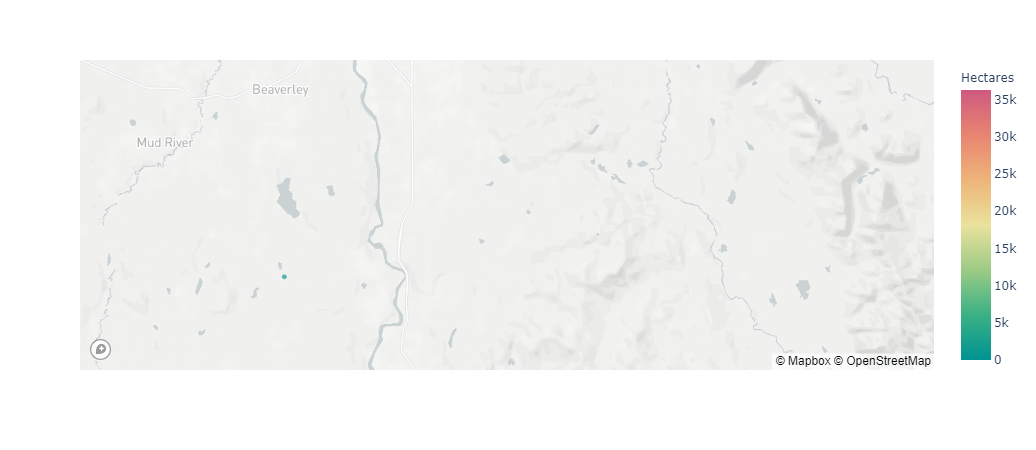

In [244]:
map_plot = px.scatter_mapbox(
    fire_df,
    lat = "Latitude.1",
    lon = "Longitude.1",
    color = "Hectares",
    size = "Hectares",
    color_continuous_scale=px.colors.diverging.Temps,
    hover_name = "Geographic",
    zoom=9
)
map_plot.show()

In [248]:
# Plotting corn and lumner in column (for tabs and panel)
price_vol_as_column1 = pn.Column(
    '# Price / Volume  ',
    '## Data on price and volume of Corn and lumber',
    fig_corn, fig_lumber
    )

# Plotting soya and price of commodities in column (for tabs and panel)
price_vol_as_column2 = pn.Column(
    '# Price / Volume ',
    '## Data on price and volume of Soya and price trend of all three commodities ',
    fig_soya, fig_agri_price
    )



Row
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Matplotlib(Figure)
        [3] Matplotlib(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Matplotlib(Figure)
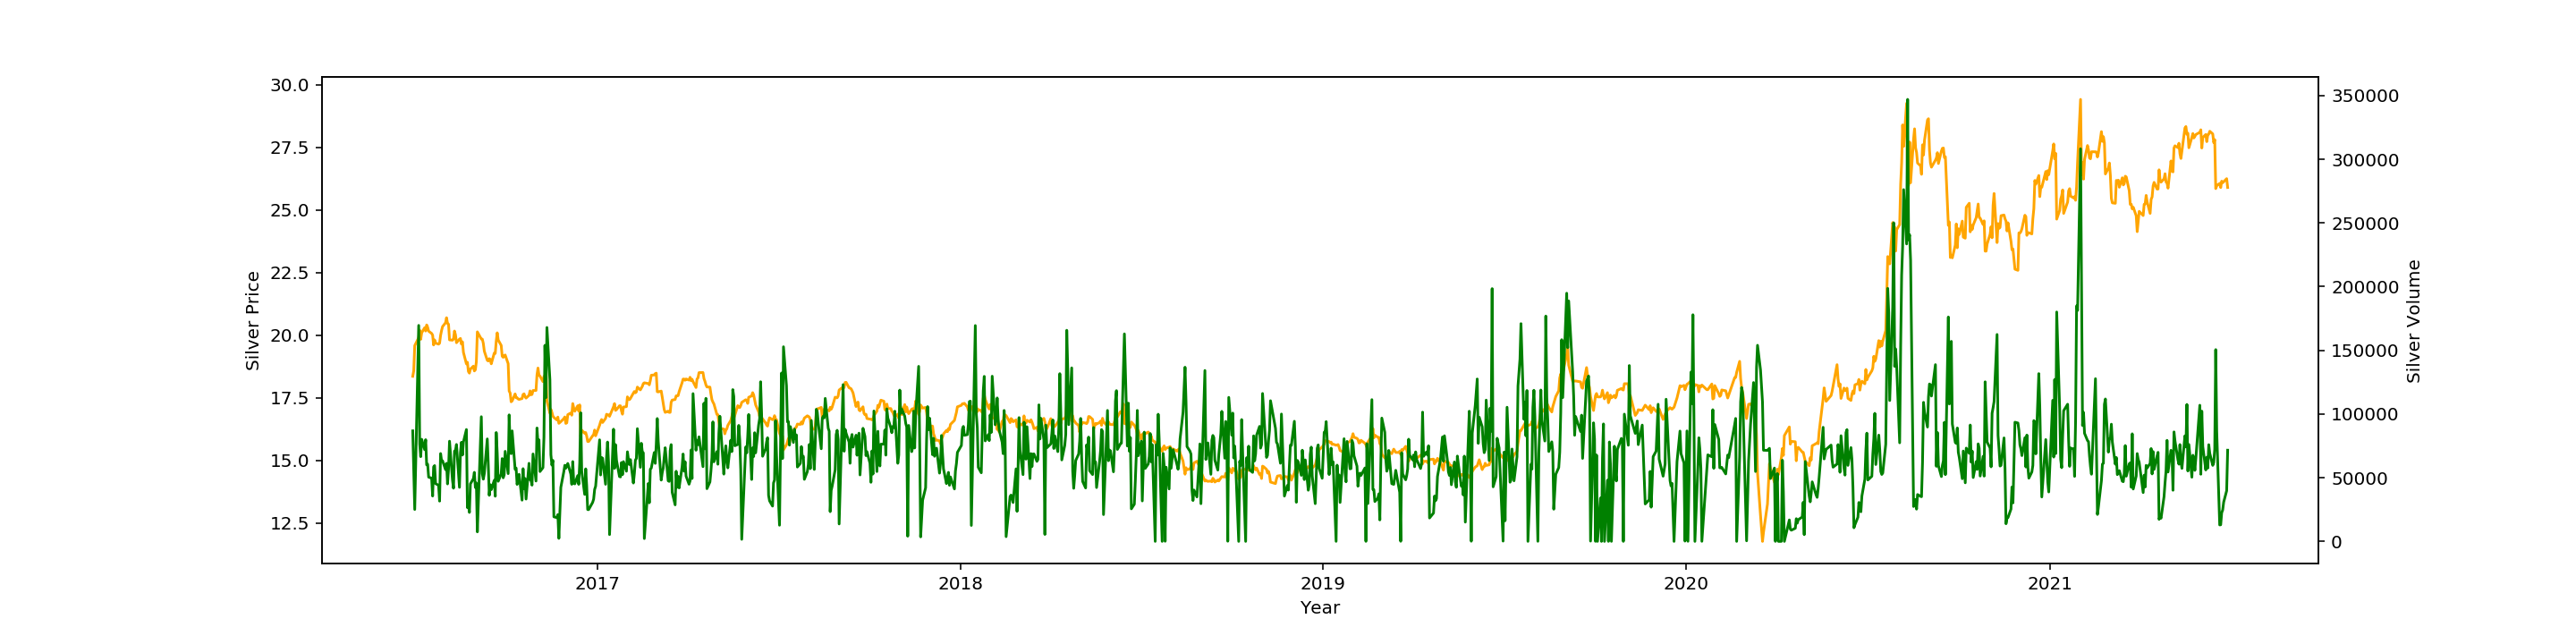
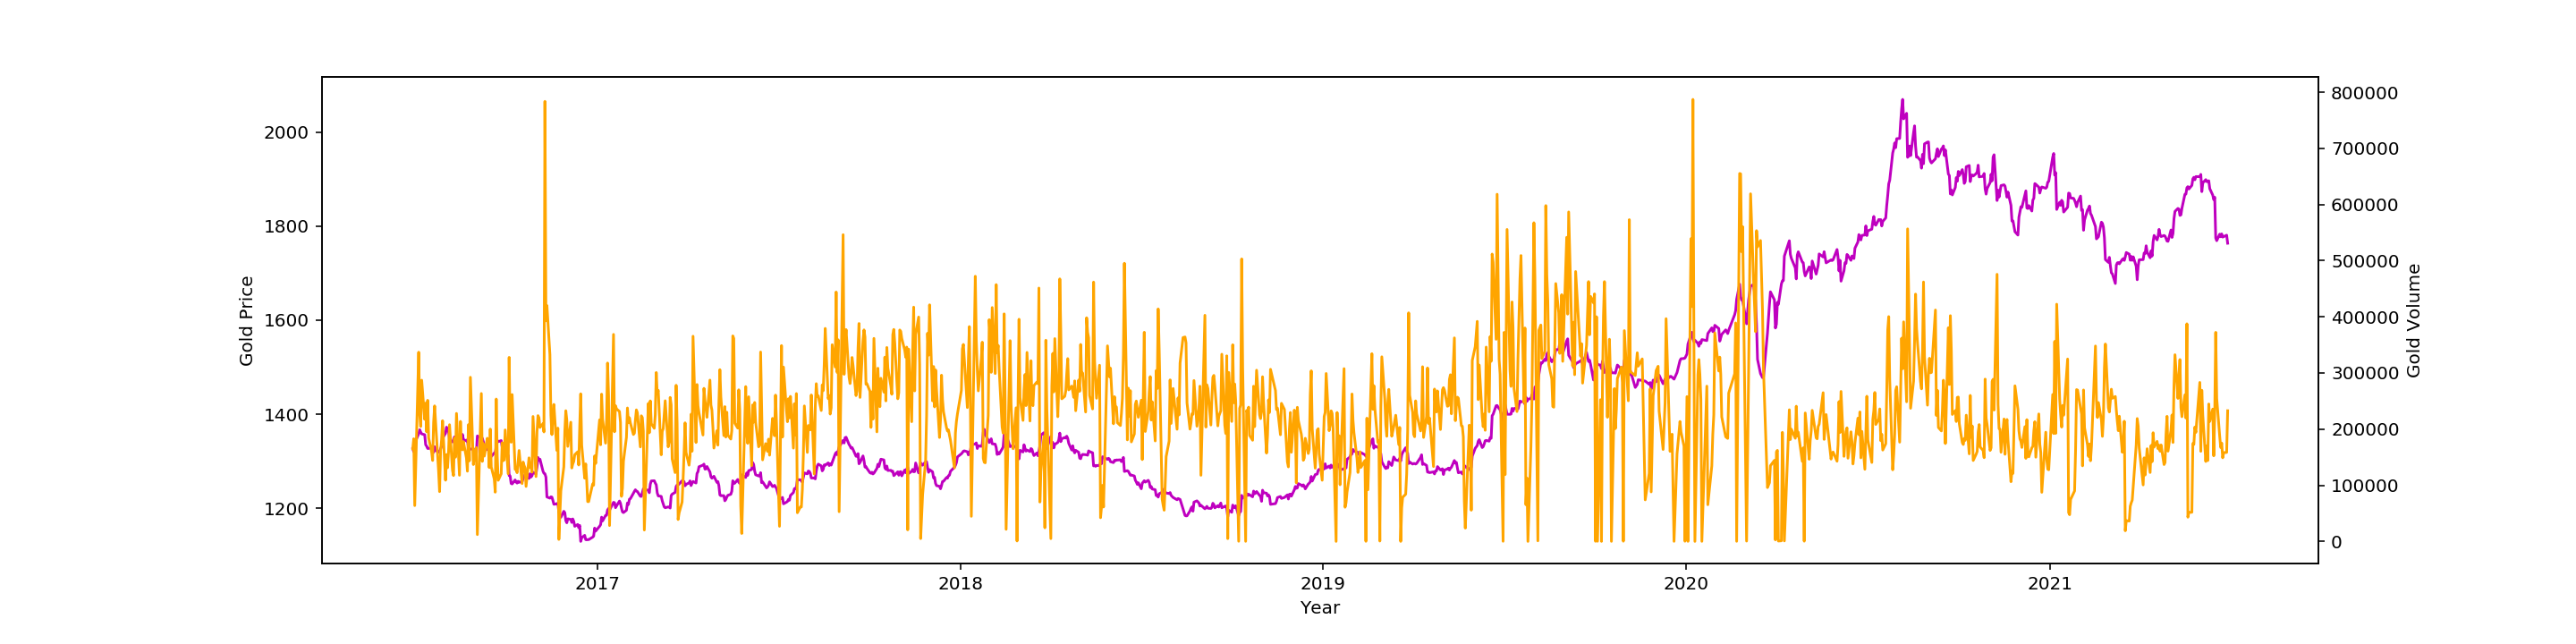
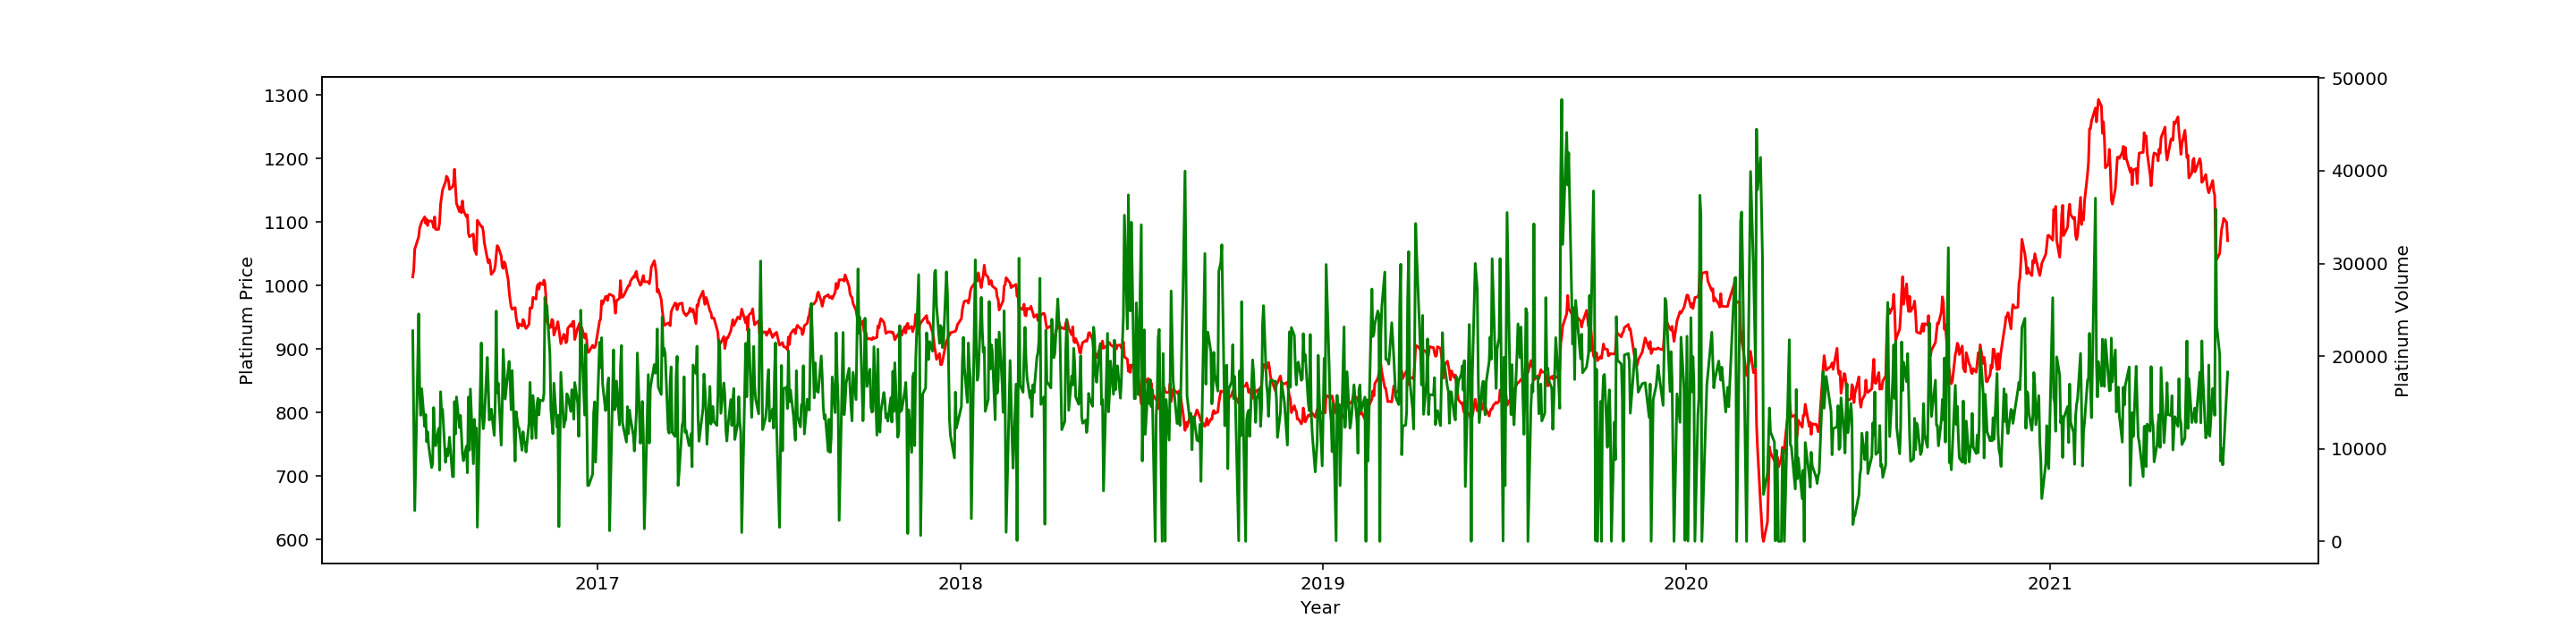

In [249]:
# converting bar and line chart functions 

price_pn=pn.Column(
    '# Close/Last',
    '## Data for Platinum and Silver',
    fig_platinum, fig_silver)
price_volume_pn=pn.Column(
    '# Price/ Volume',
    '## Data for Gold',
    fig_gold)

price_and_volume=pn.Row(price_pn,price_volume_pn)
price_and_volume

Row
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Matplotlib(Figure)
        [3] Matplotlib(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Matplotlib(Figure)
        [3] HoloViews(NdOverlay)
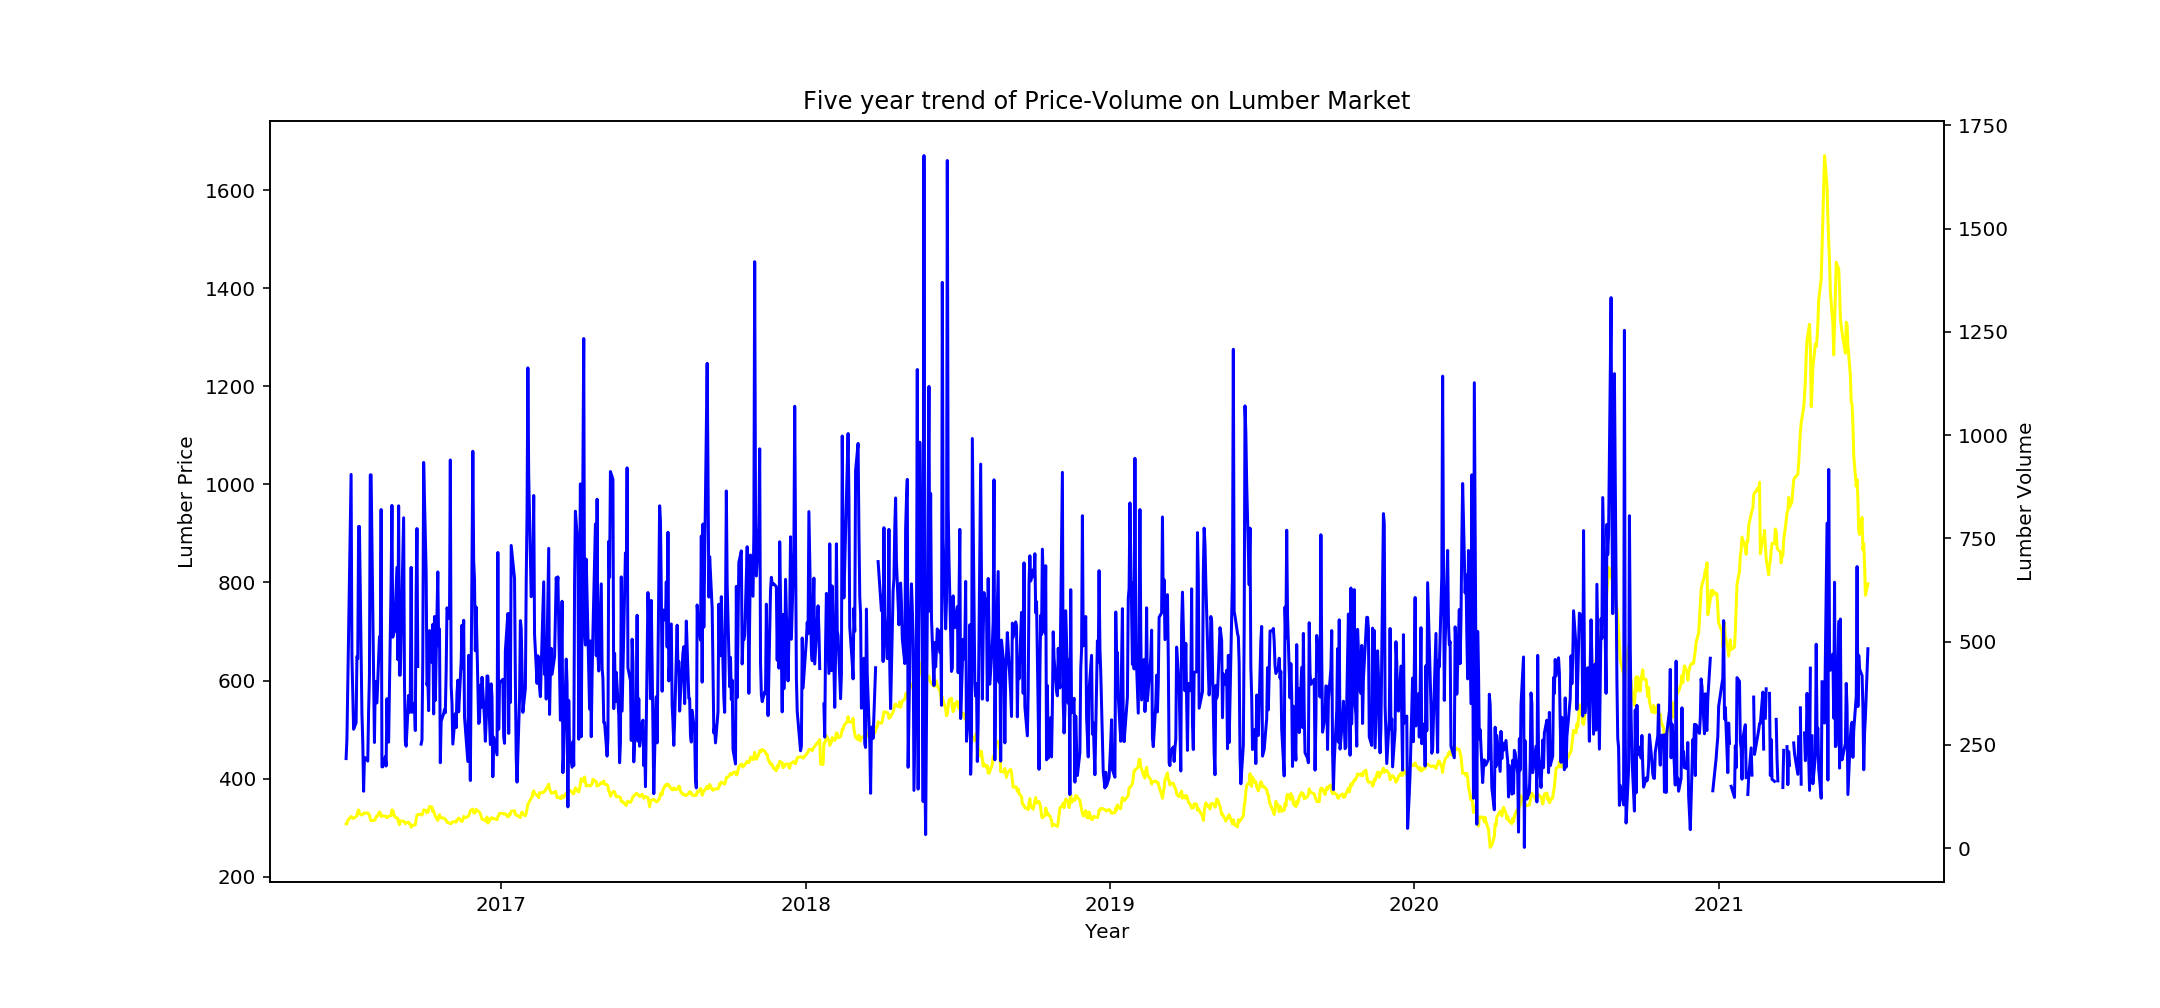
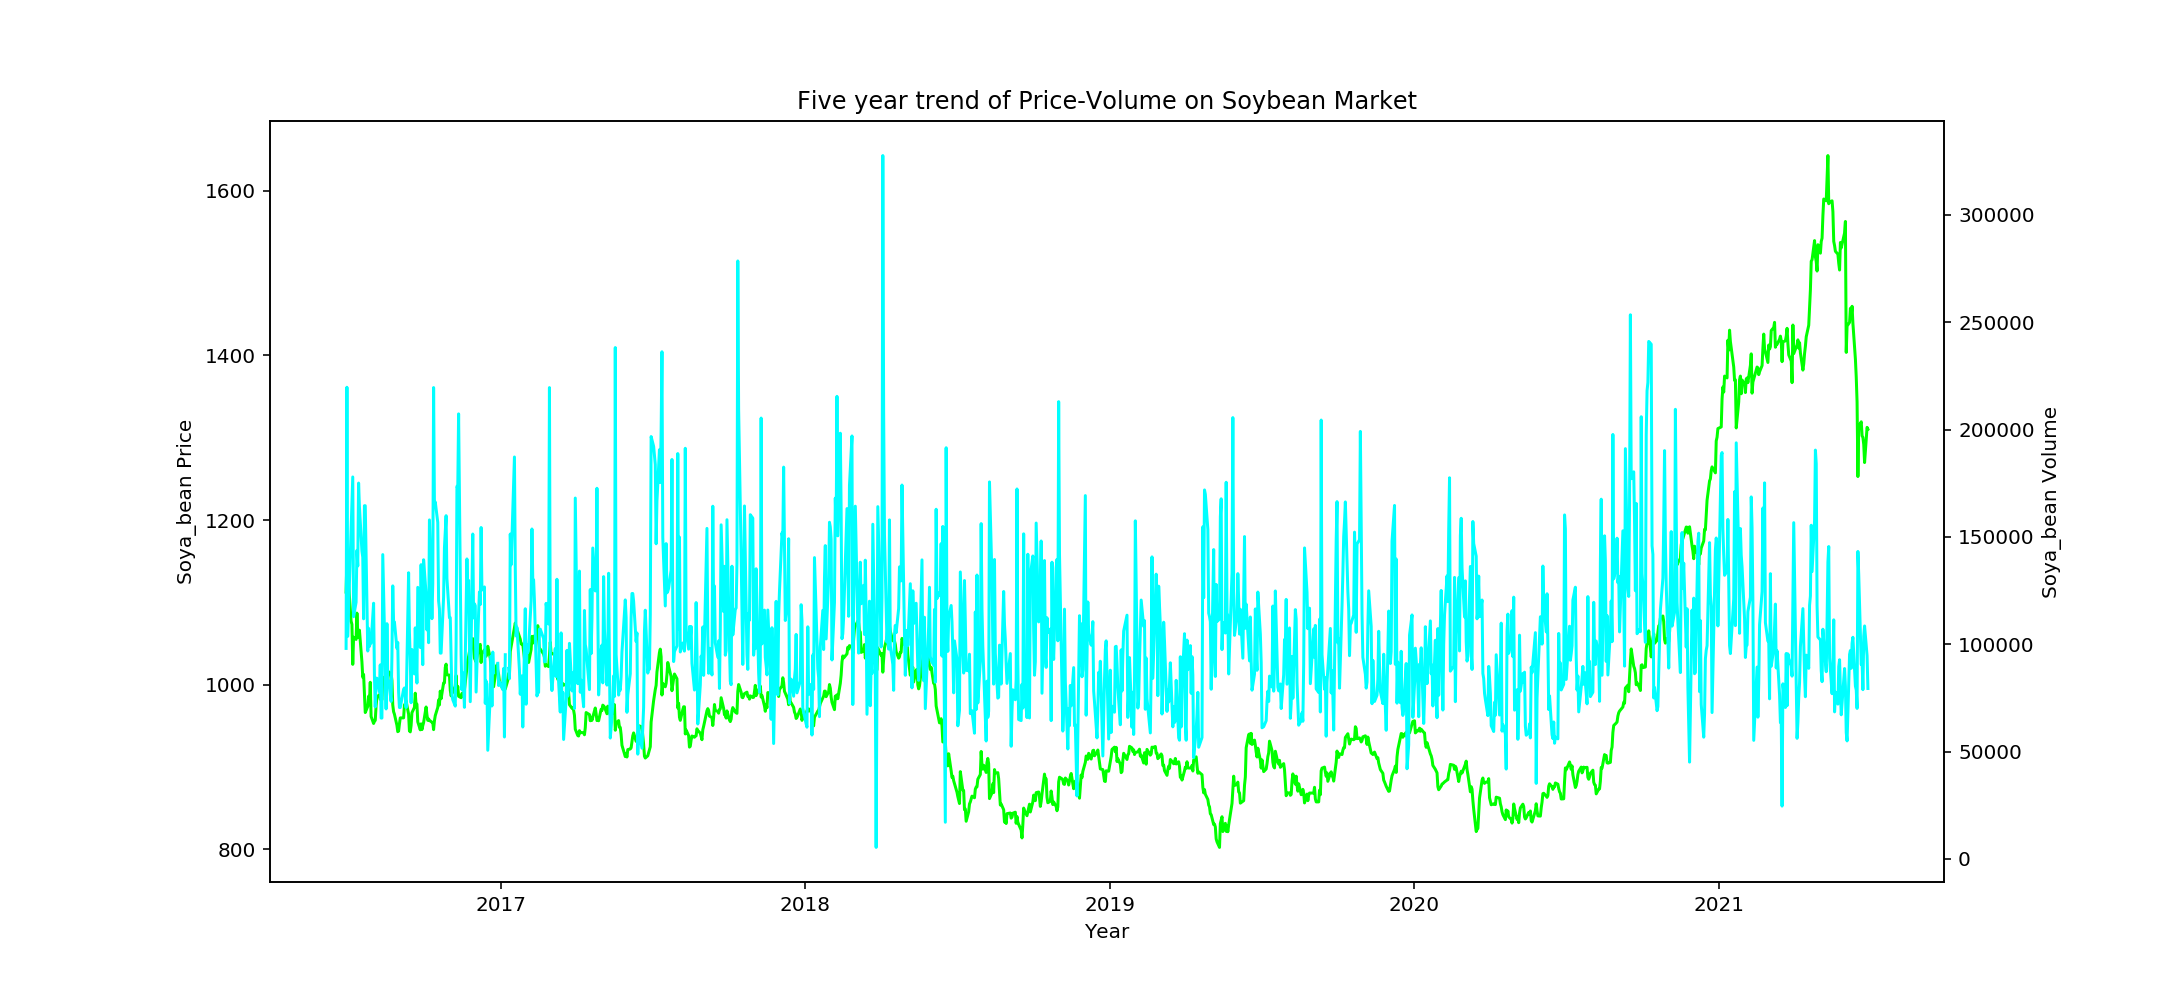
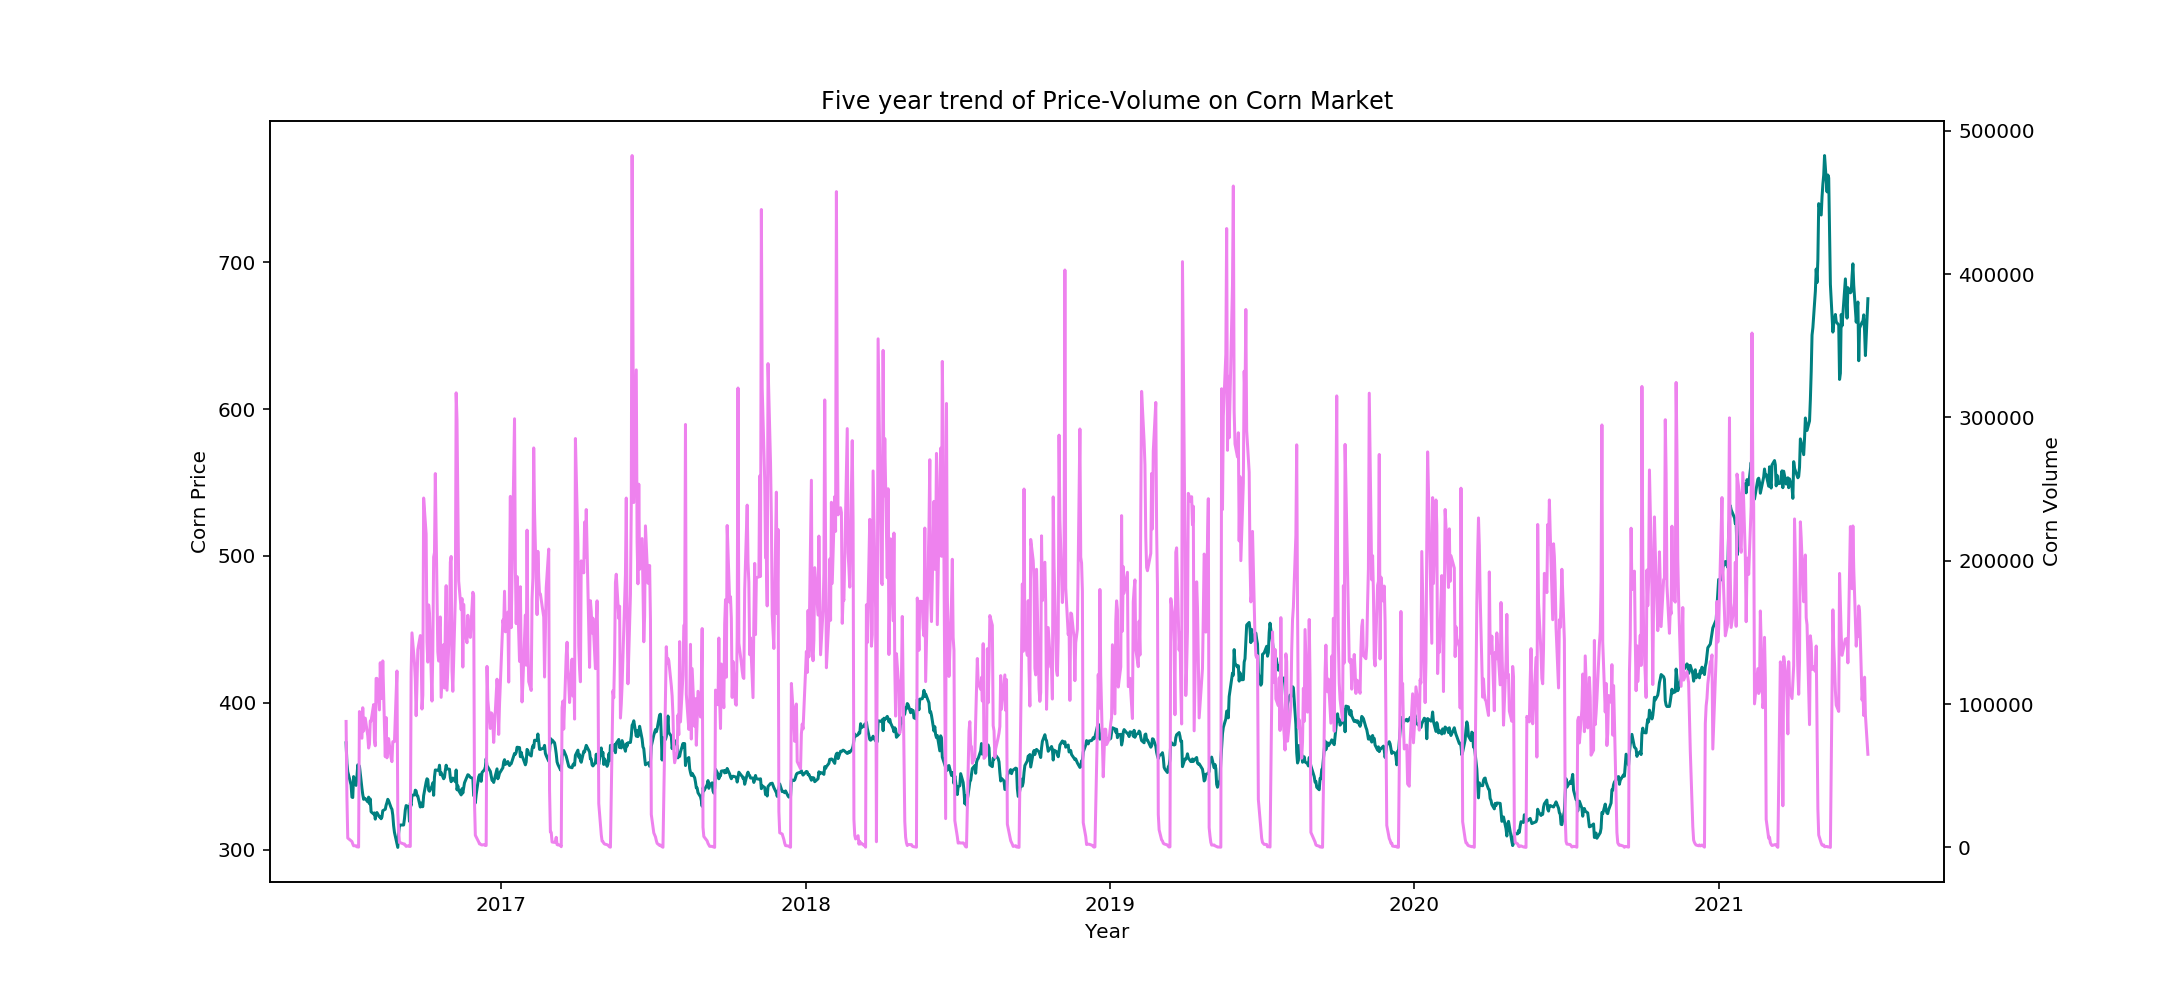

In [250]:
# create a Title for the Dashboard 
title= pn.pane.Markdown('Commodities and COVID..')

# Define a welcome text

welcome_text= pn.pane.Markdown(' In this Data Analysis we will explore how the Commodities Market was impacted during COVID-19 ')

#converting charts to create Dashboard
Welcome_text=pn.Column(welcome_text)

price_vol_row = pn.Row(price_vol_as_column1, price_vol_as_column2)
price_vol_row



Column(height=800, sizing_mode='fixed', width=1000)
    [0] Row
        [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
        [1] Row
            [0] Column
                [0] Markdown(str)
                [1] Markdown(str)
                [2] Matplotlib(Figure)
                [3] Matplotlib(Figure)
            [1] Column
                [0] Markdown(str)
                [1] Markdown(str)
                [2] Matplotlib(Figure)
                [3] HoloViews(NdOverlay)
        [2] Row
            [0] Column
                [0] Markdown(str)
                [1] Markdown(str)
                [2] Matplotlib(Figure)
                [3] Matplotlib(Figure)
            [1] Column
                [0] Markdown(str)
                [1] Markdown(str)
                [2] Matplotlib(Figure)
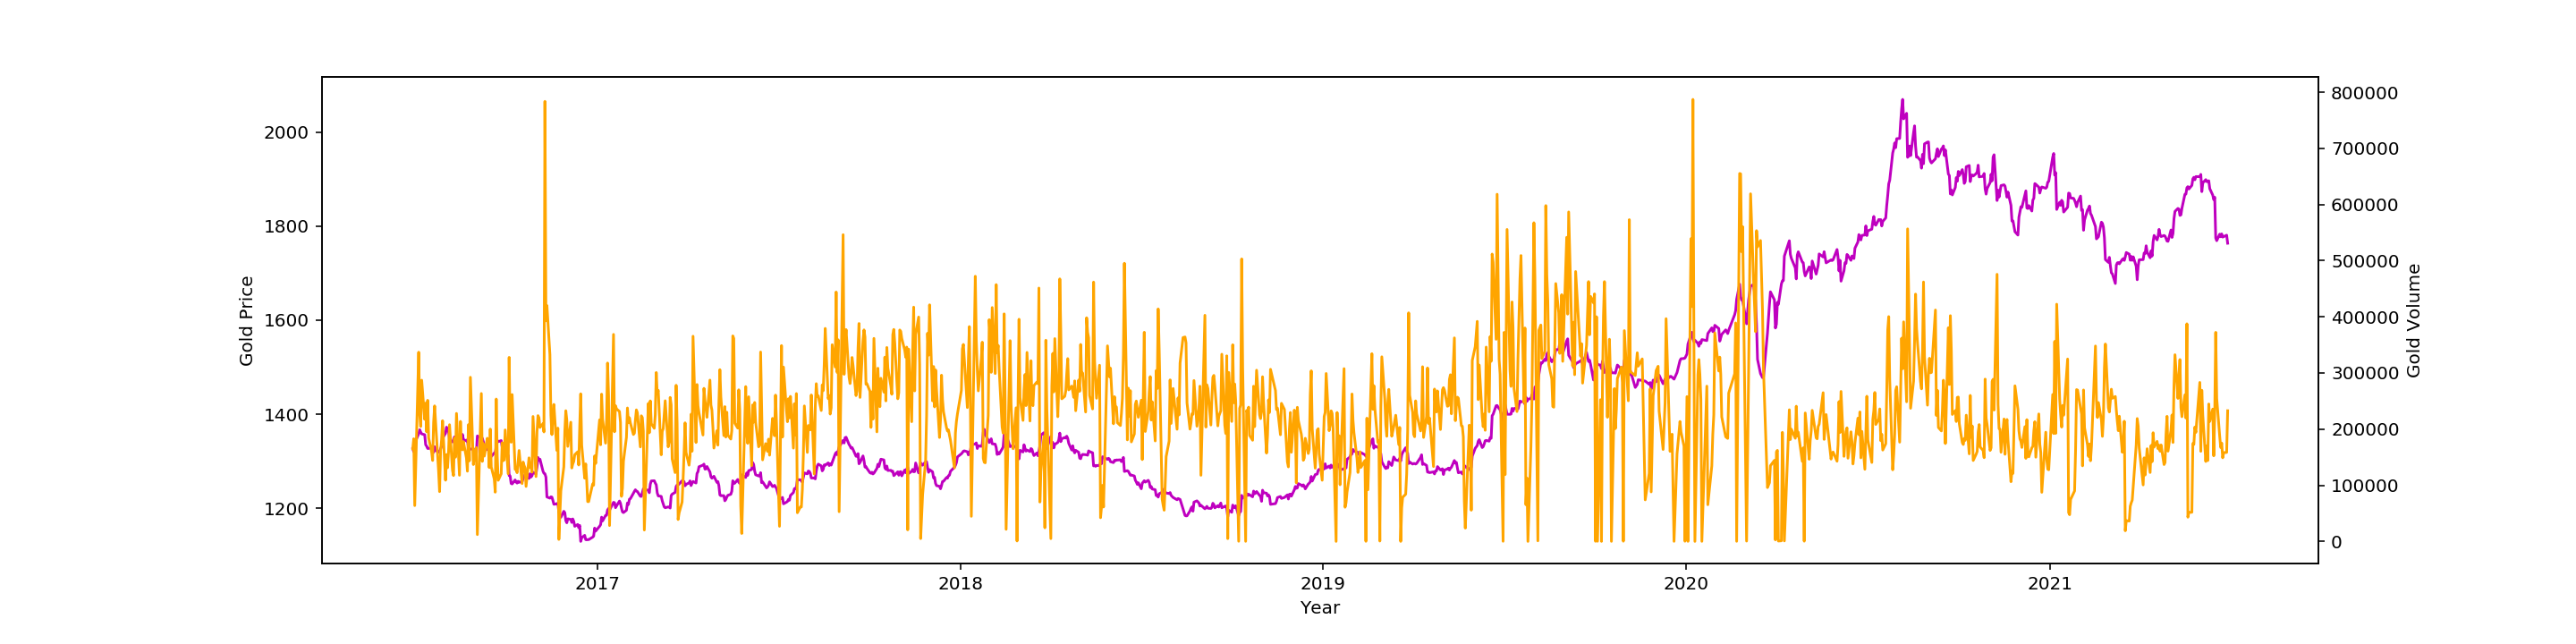
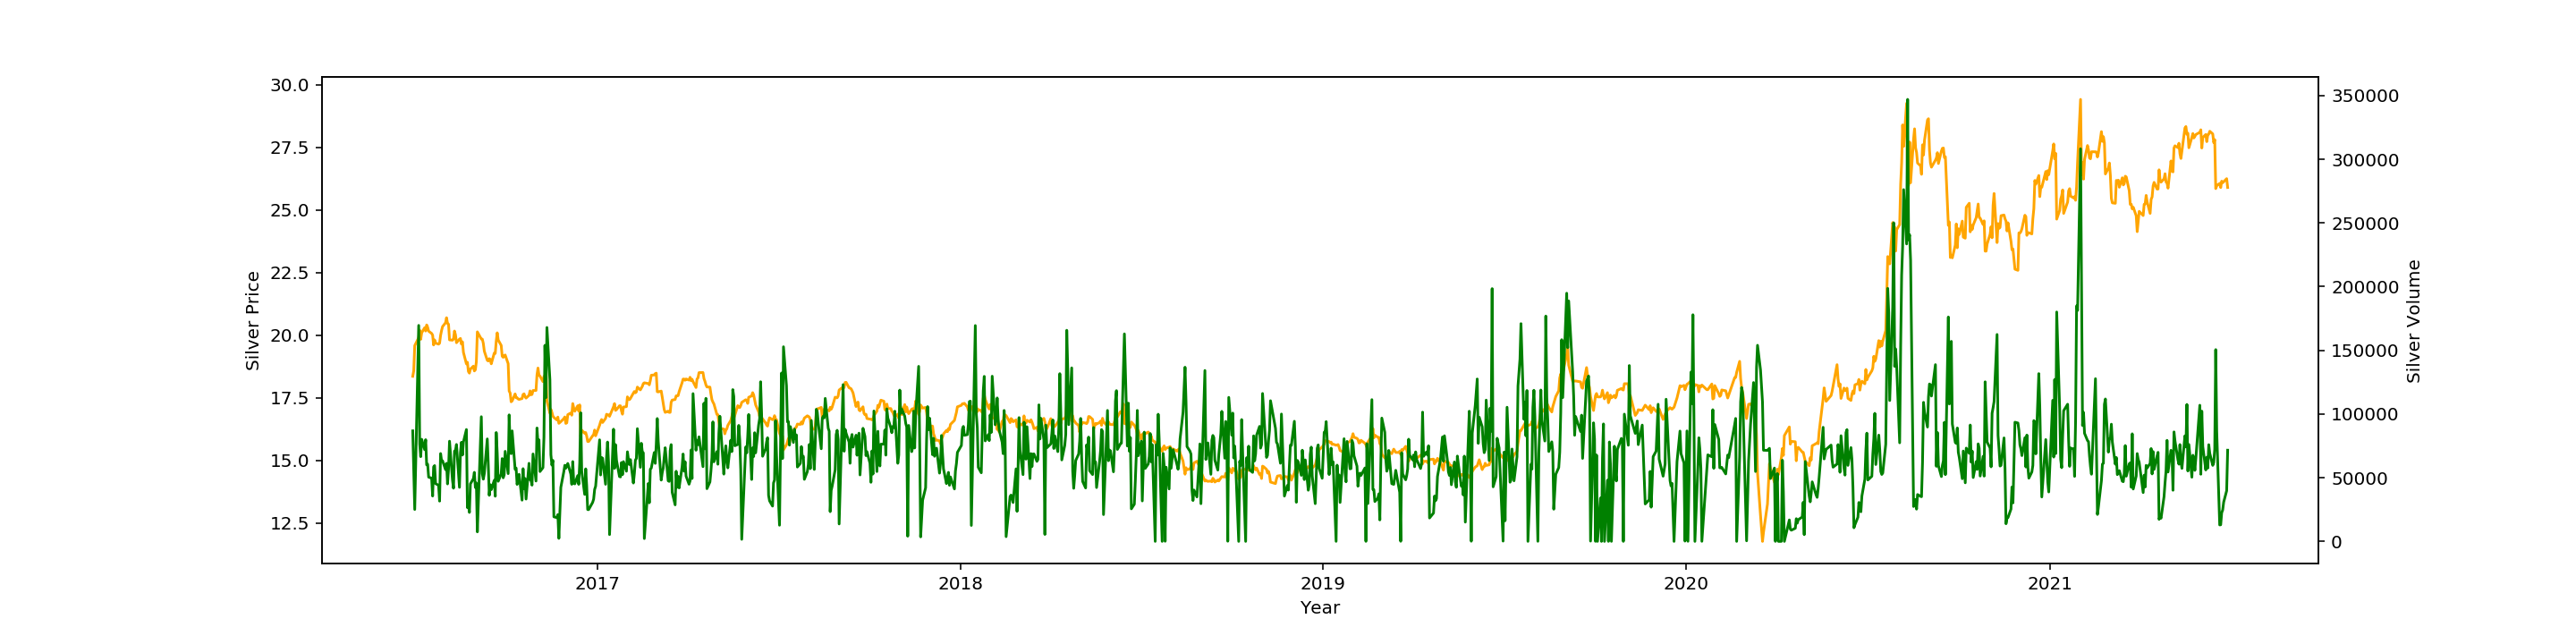
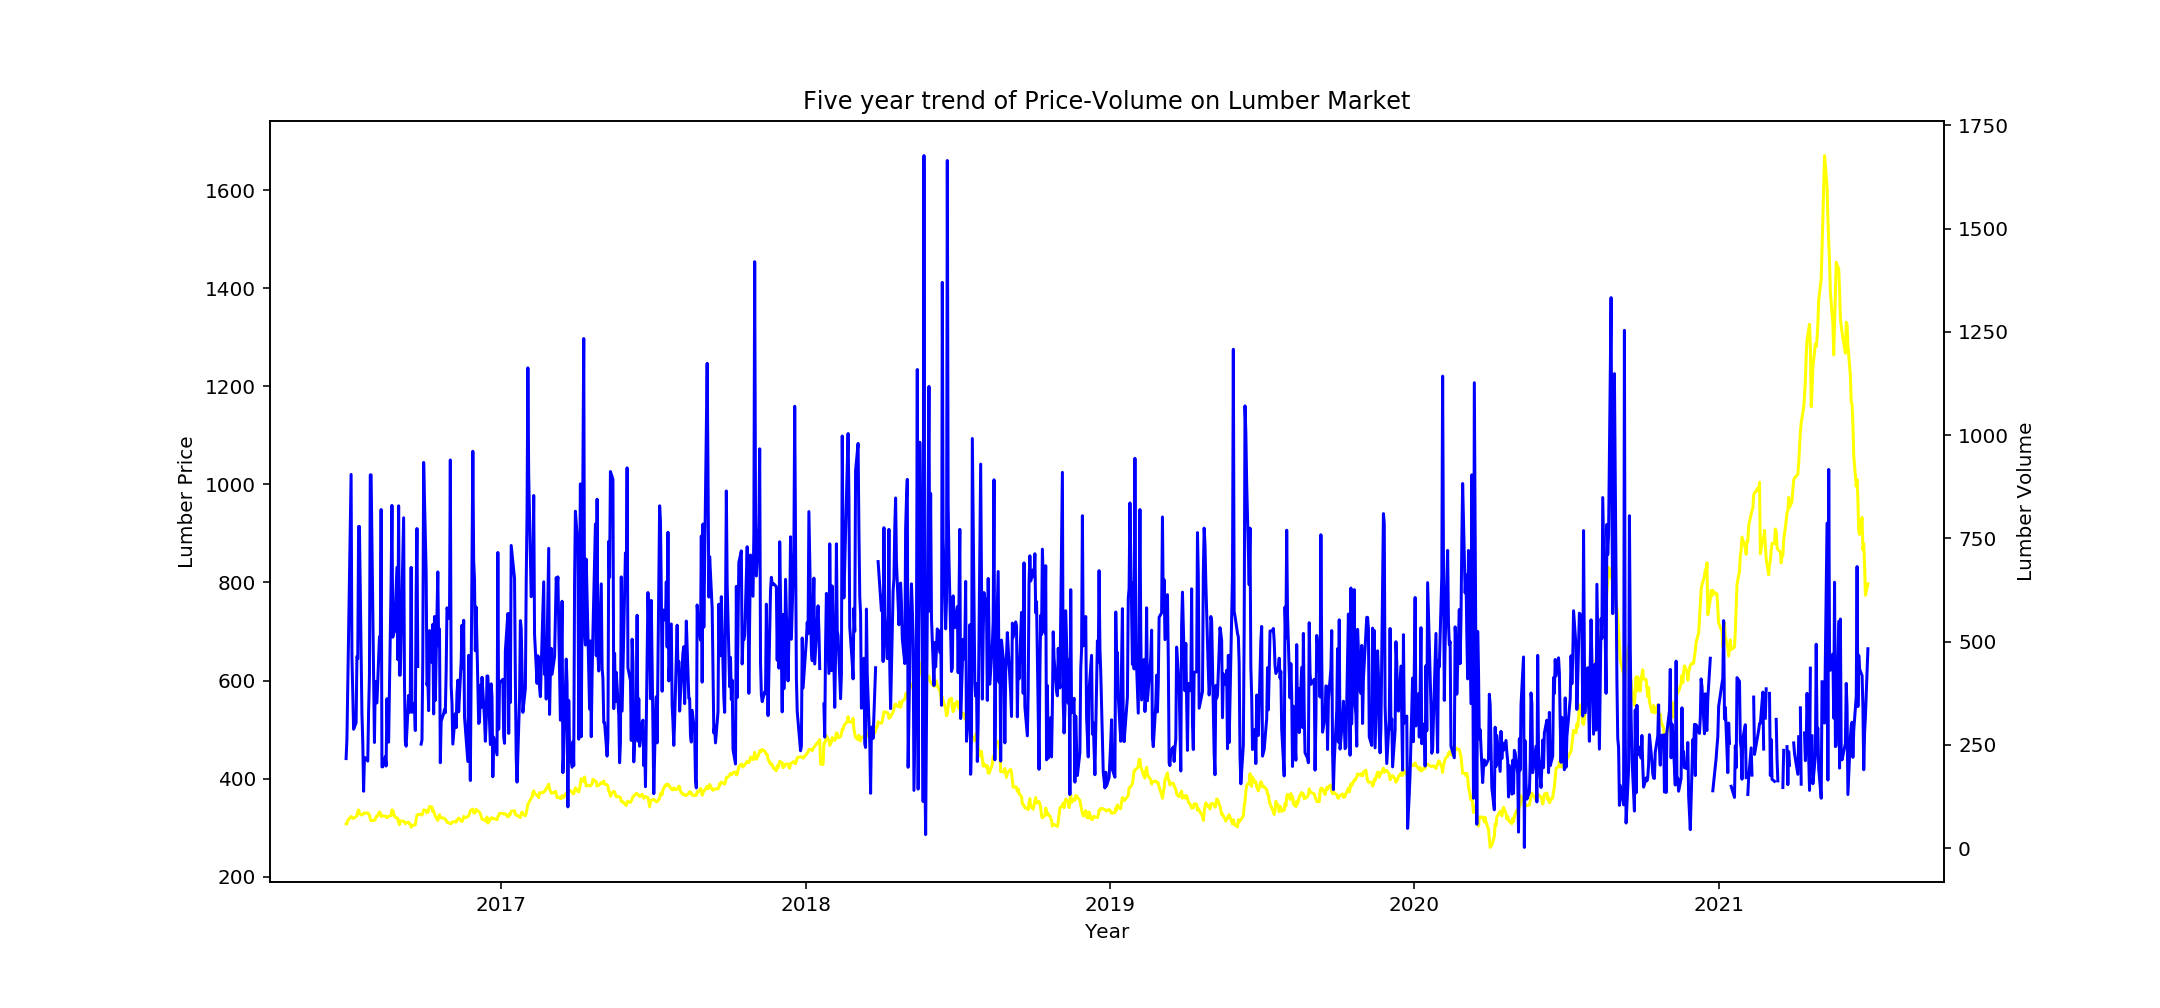
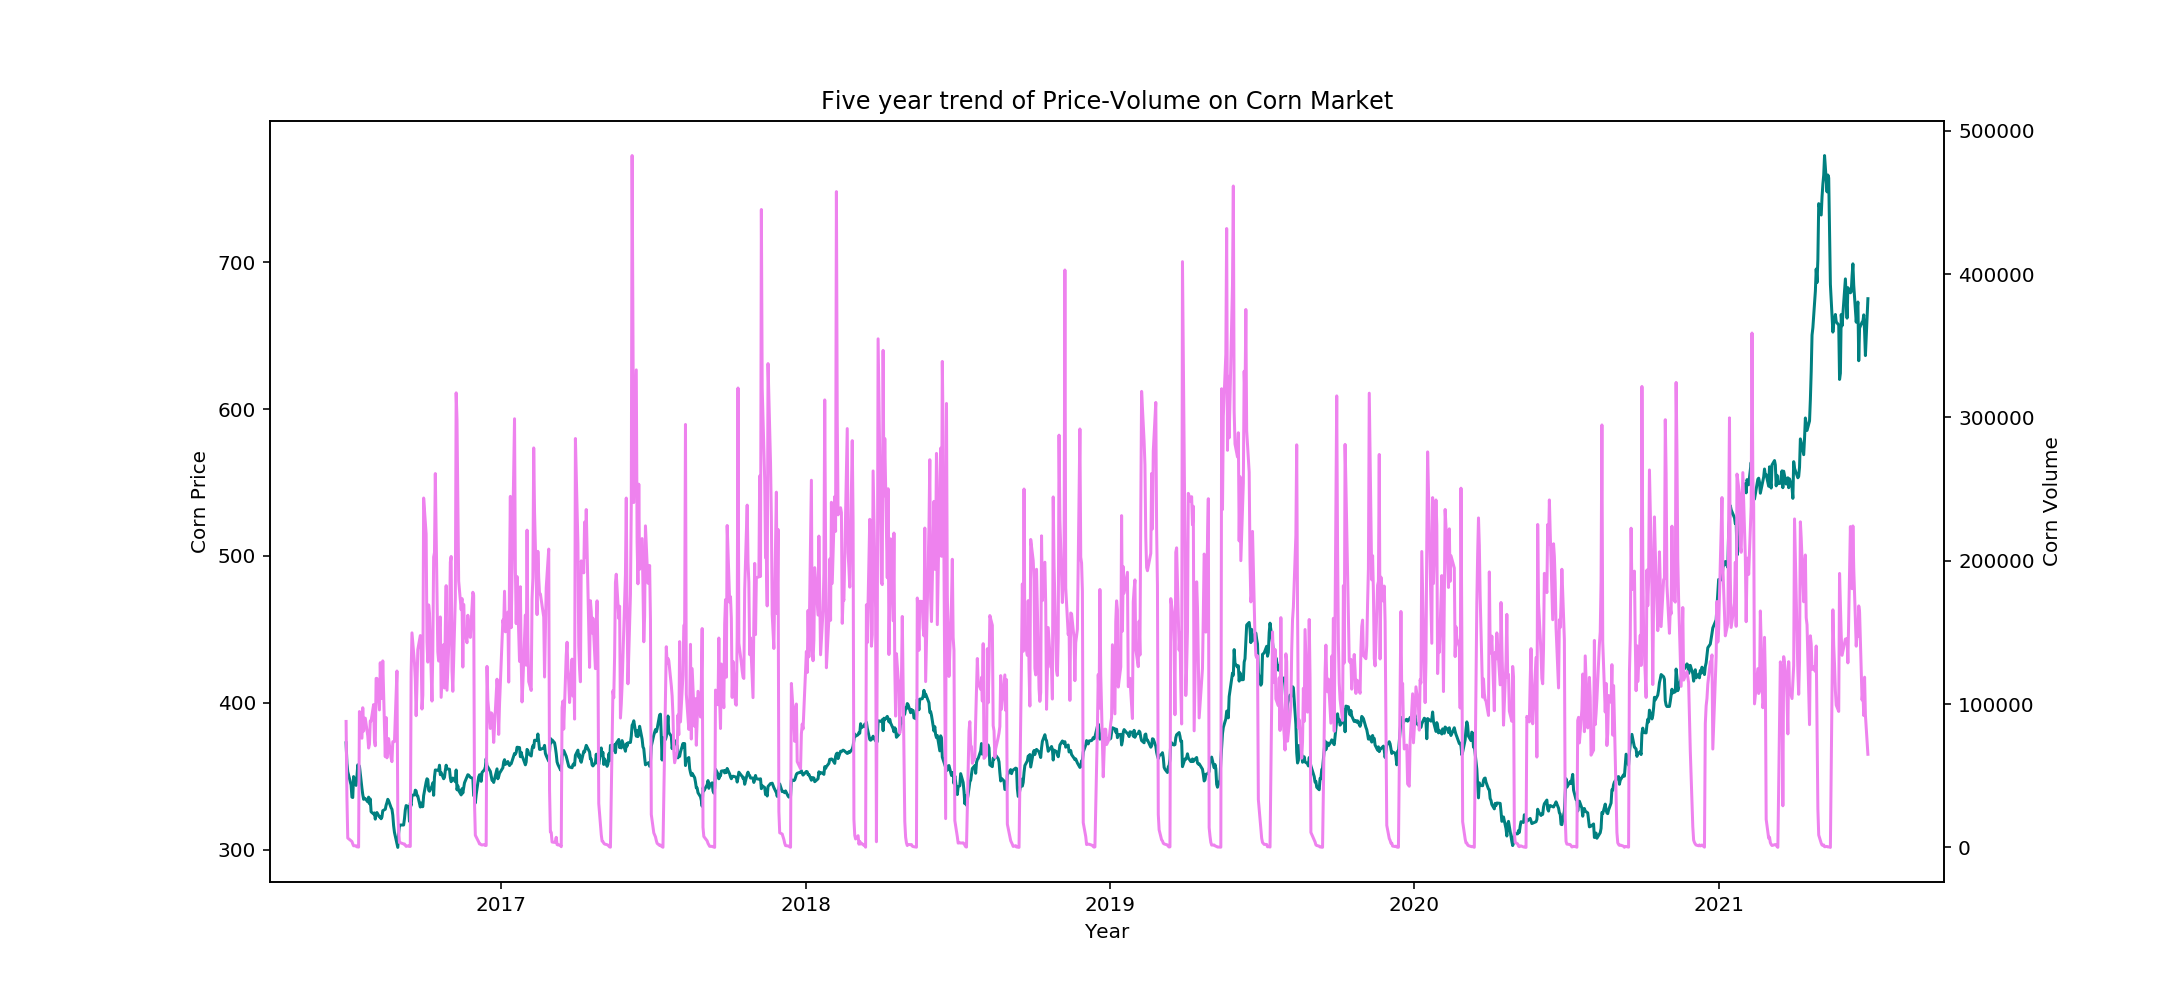
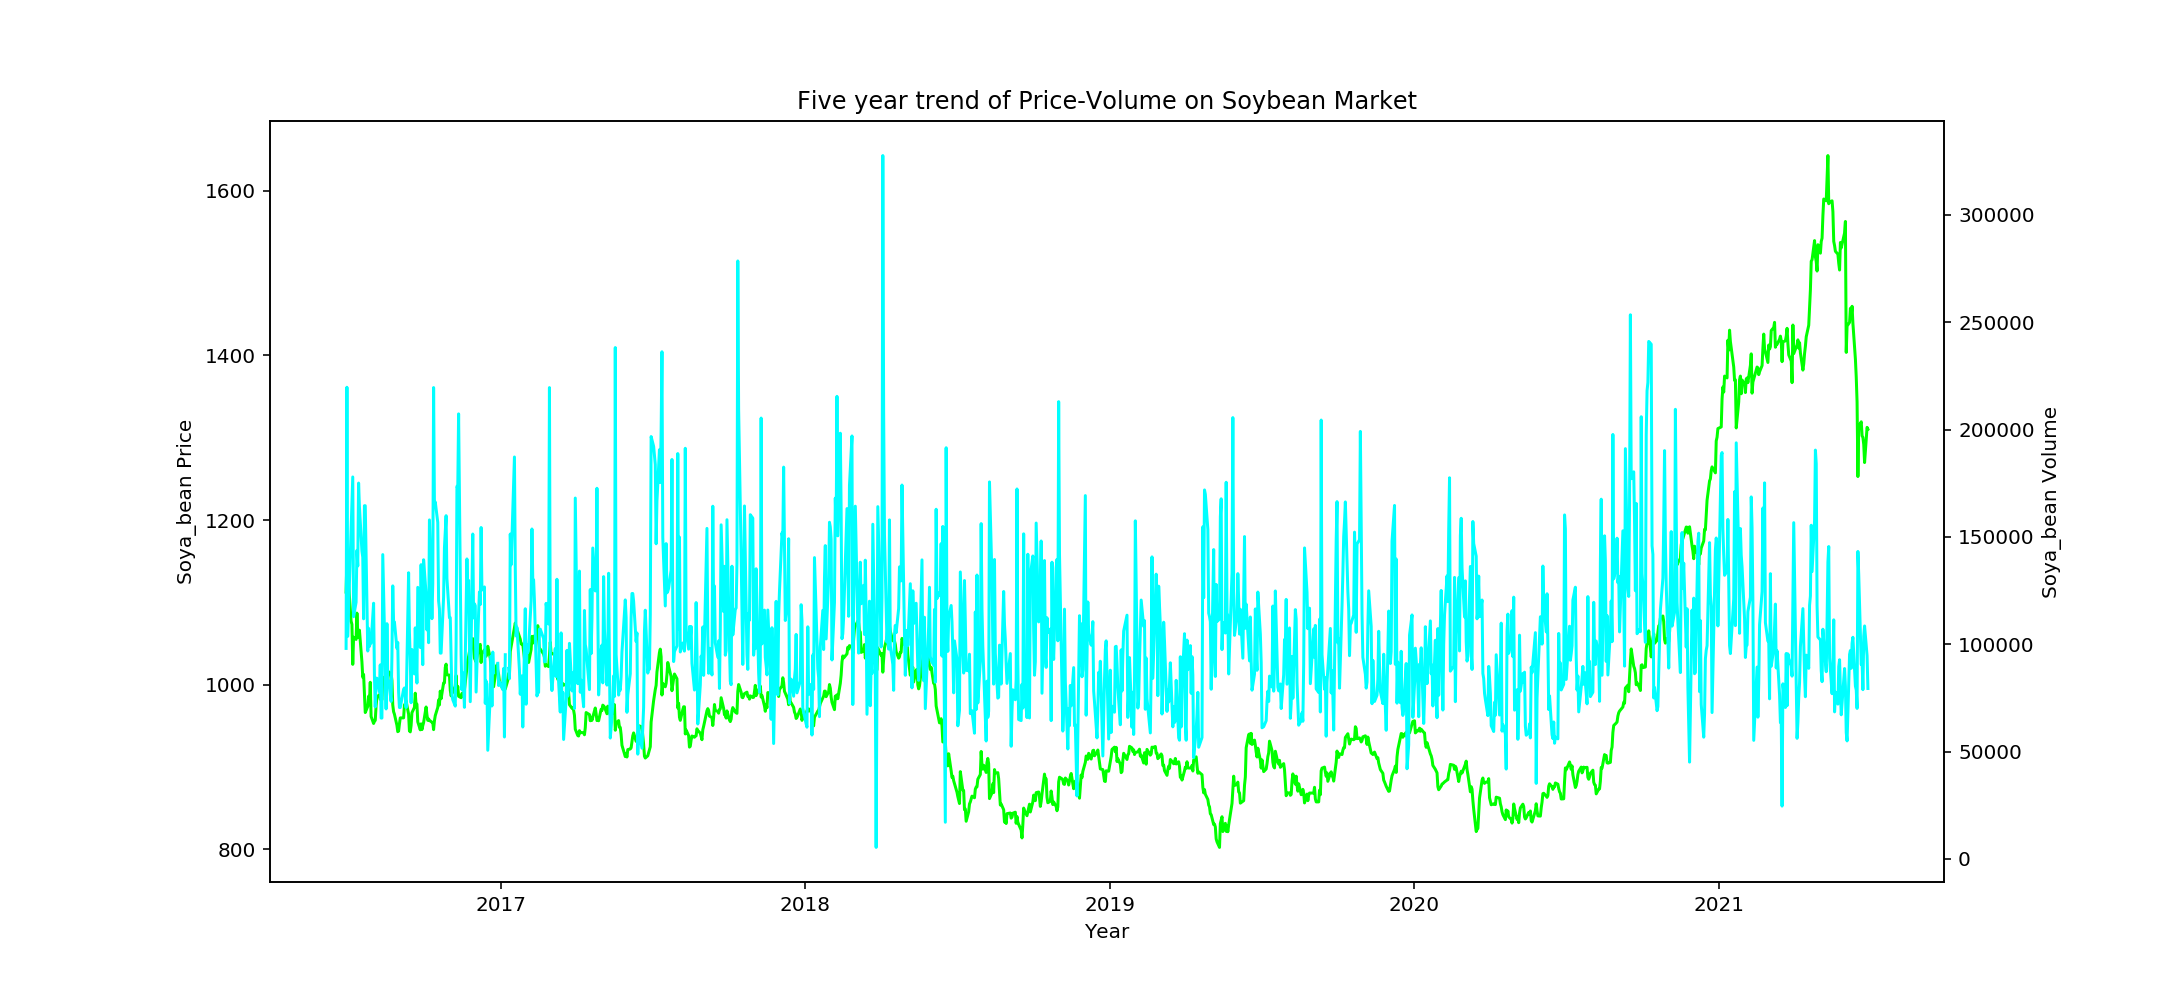
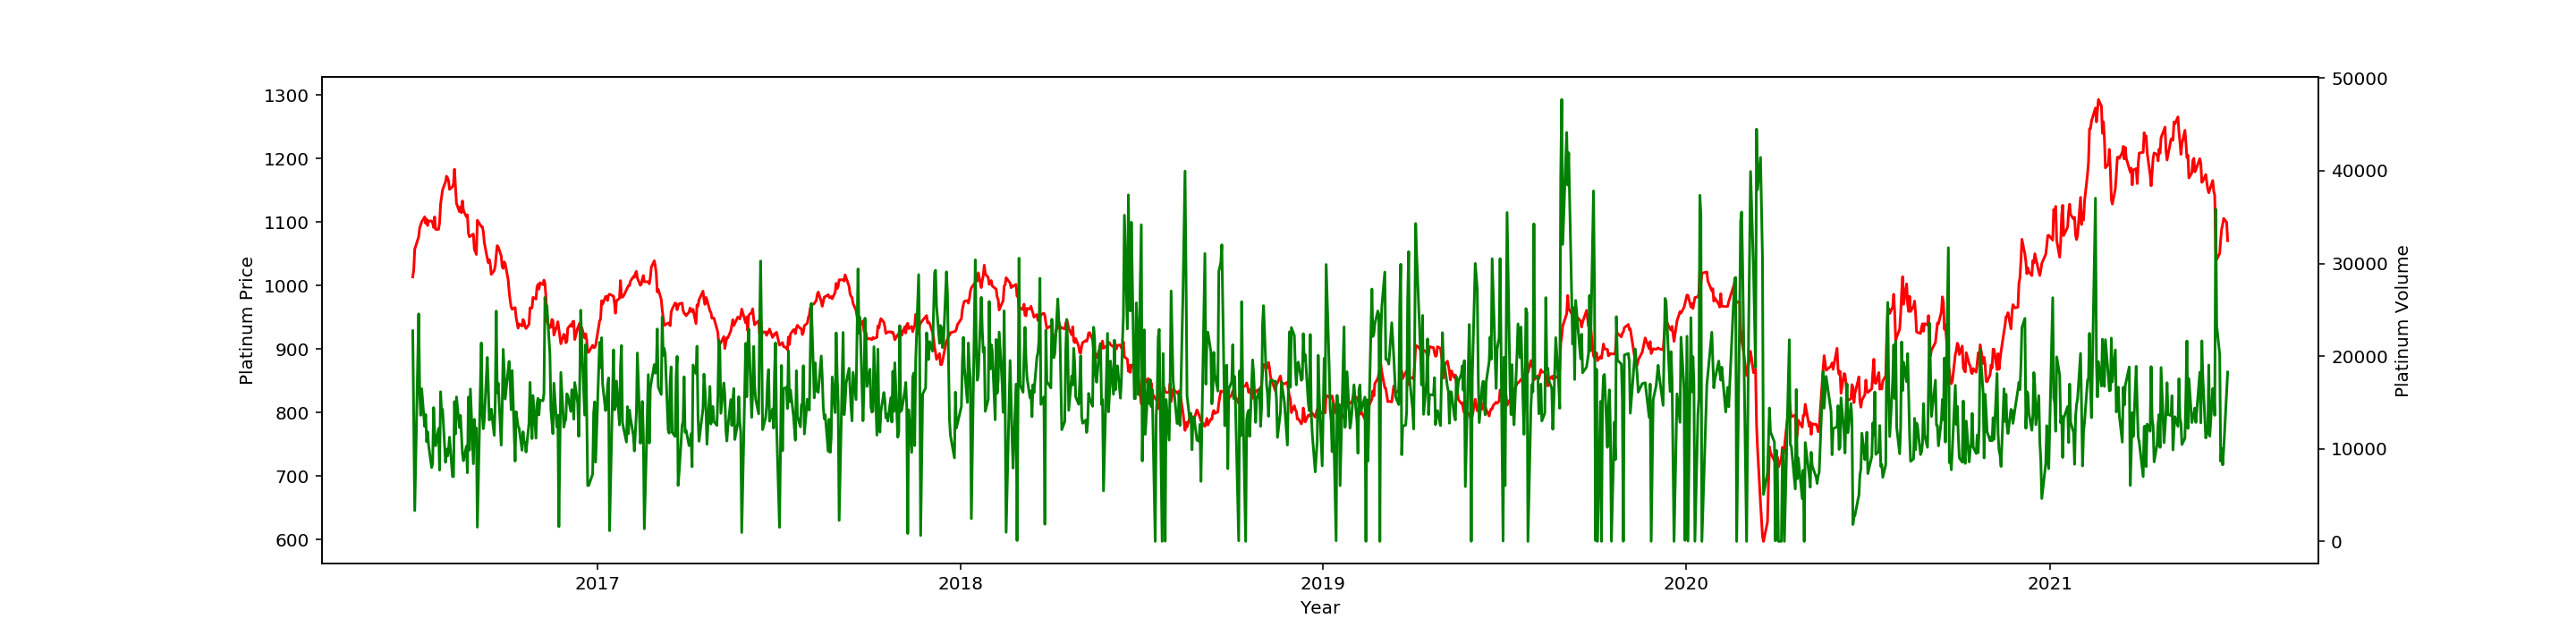

In [256]:
Tabs=pn.Tabs(
    ('Welcome_text',pn.Column(welcome_text)),
    ('price volume',  pn.Row(price_vol_as_column1, price_vol_as_column2)),
    ('Gold',pn.Row(price_pn,price_volume_pn))

)
dashboard=pn.Column(pn.Row(title),Tabs,width=1000,height=800)
dashboard